In [74]:
# Import Required Packages
import torch
import os
import json
import sys
import re
import random
import importlib.util
from typing import *
from tqdm import tqdm 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

In [75]:
from typing import List

def plot_arc_train_data(train_data: List[dict], id: str = None, label: str = None) -> None:
    """
    Plots input-output pairs from the 'train' data in horizontal layout.
    """
    cmap = ListedColormap([
        '#000000', '#0074D9', '#FF4136', '#2ECC40', '#FFDC00',
        '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'
    ])
    args = {'cmap': cmap, 'vmin': 0, 'vmax': 10}
    
    # Number of examples
    n_examples = len(train_data)
    fig_width = n_examples * 3  # Scale for horizontal spacing
    fig_height = 3
    
    # Create a figure with 2 rows (input-output) and n_examples columns
    fig, axes = plt.subplots(2, n_examples, figsize=(fig_width, fig_height))
    
    # Ensure axes is always a 2D array
    if n_examples == 1:
        axes = axes[:, np.newaxis]
    
    for col, example in enumerate(train_data):
        input_grid = np.array(example['input'])
        output_grid = np.array(example['output'])
        
        # Plot input
        axes[0, col].imshow(input_grid, **args)
        axes[0, col].axis('off')
        
        # Plot output
        axes[1, col].imshow(output_grid, **args)
        axes[1, col].axis('off')
    
    fig.suptitle(f"Task: {id} and perceptions: {label}")
    plt.tight_layout()
    plt.show()

In [76]:
def create_arc_training_tasks(directory_path, list_labels):
    data = {}
    
    filenames = sorted([f for f in os.listdir(directory_path) if f.endswith(".json")])
    # Iterate through the filenames with their index using enumerate
    for i, filename in enumerate(filenames):
        file_path = os.path.join(directory_path, filename)
        
        # Skip non-JSON files
        if not filename.endswith(".json"):
            continue

        try:
            with open(file_path, "r") as f:
                task_data = json.load(f)
                
            # Ensure there is a corresponding label for each task
            if i < len(list_labels):
                name = os.path.splitext(filename)[0]
                add_entry(data, i, name, list_labels[i], task_data)
            else:
                print(f"Warning: No label found for file '{filename}'")
                
        except json.JSONDecodeError:
            print(f"Error: Failed to decode JSON from file '{filename}'")
    
    return data

def add_entry(dictionary, entry_id, name, perceptions, example):
    dictionary[entry_id] = {
        "name": name,
        "perceptions": perceptions,
        "example": example
    }


1. Containment: Ability to recognize whether an object is inside, enclosed by, or surrounded by another
object.
2. Depth: Ability to determine the relative position of objects, such as whether one object is on top of or
behind another.
3. Symmetry: Ability to recognize balanced and mirrored patterns within objects or scenes and generating symmetrical forms or designs based on axes of reflection, rotation, or translation.
4. Categorical: Ability to identify groups based on shared features, dichotomize space into distinct categories, compare the resulting divisions, and apply group-specific rules or distinctions accordingly.
5. Spatial-Orientation: Ability to recognize and differentiate directions, particularly horizontal and verti-
cal alignment.
6. Spatial-Ordinal: Ability to distinguish and relate positions (e.g., higher, lower, left, right) relative to a
reference point or directional context.
7. Similarity: Ability to group or differentiate objects based on shared characteristics such as shape, pat-
tern, or color, and to apply rules or actions accordingly.
8. Quantitative: Ability to estimate, count, and assess the number of discrete objects or elements in a
scene.
9. Replication: Ability to duplicate, reproduce, or augment patterns and objects, facilitating the creation
and extension of similar elements (similar to continuity).
10. Figure-Ground: Ability to distinguish meaningful forms from background noise by leveraging cues like
similarity, enabling the extraction and recognition of salient objects in any environment.
11. Continuity: Ability to extend or continue shapes, lines, or patterns to the edge of a defined boundary.
12. Size: Ability to estimate and compare dimensions such as length, breadth, and overall scale of objects
or spaces.
13. Closure: Ability to perceive incomplete shapes, lines, or patterns as enclosed and coherent figures.
14. Centroid: Ability to identify the central point of an object, including its center of mass and whether its
structure is solid or hollow.
15. Topological: Ability to understand shapes, connectedness, and inherent symmetries.
16. Motion: Ability to perceive, interpret, and plan movements.

In [85]:
list_perceptions = ["replication",
        "centroid",
        "replication",
        "motion",
        ["continuity", "replication"],
        "categorical",
        ["replication"],
        ["motion","categorical"],
        "topological",
        "size",
        "similarity",
        "replication",
        "continuity",
        "similarity",
        "replication",
        "symmetry",
        ["symmetry","replication"],
        "similarity",
        "replication",
        "symmetry",
        "quantitative",
        ["motion","depth"],
        ["similarity","topological"],
        ["continuity","depth"],
        "motion",
        "categorical",
        "symmetry",
        "continuity",
        "figure-ground",
        "spatial-ordinal",
        "figure-ground",
        "motion",
        "replication",
        "continuity",
        "continuity",
        "figure-ground",
        ["continuity","topological"],
        "quantitative",
        ["similarity","symmetry"],
        "spatial-ordinal",
        "closure",
        ["topological","motion"],
        "replication",
        ["motion","centroid"],
        "categorical",
        ["topological","depth"],
        ["continuity","depth"],
        "topological",
        "size",
        ["spatial-ordinal","closure"],
        "continuity",
        "spatial-orientation",
        "motion",
        ["replication","figure-ground"],
        "centroid",
        "figure-ground",
        "replication",
        "continuity",
        "quantitative",
        ["continuity","spatial-ordinal"],
        "replication",
        ["figure-ground","symmetry"],
        ["size","spatial-orientation"],
        ["topological","continuity"],
        "similarity",
        ["topological","continuity"],
        "similarity",
        "quantitative",
        "replication",
        "closure",
        "symmetry",
        "categorical",
        "motion",
        "symmetry",
        "replication",
        ["replication","spatial-orientation"],
        "closure",
        "motion",
        "quantitative",
        "replication",
        "closure",
        "continuity",
        ["replication","symmetry"],
        "continuity",
        "topological",
        ["similarity","replication"],
        "symmetry",
        ["figure-ground","centroid"],
        ["replication","categorical"],
        ["quantitative","closure"],
        ["closure","size"],
        ["spatial-orientation","closure"],
        "motion",
        ["centroid","depth"],
        ["replication"],
        ["motion","size"],
        "topological",
        "centroid",
        "closure",
        "size",
        "replication",
        ["centroid","topological"],
        "topological",
        "continuity",
        "closure",
        "symmetry",
        "continuity",
        "topological",
        ["replication","symmetry"],
        "replication",
        "figure-ground",
        "symmetry",
        "symmetry",
        ["It looks to be corrupt", "continuity","spatial-ordinal"],
        ["topological","spatial-ordinal"],
        "symmetry",
        "symmetry",
        "figure-ground",
        "continuity",
        "centroid",
        "figure-ground",
        ["motion","centroid"],
        "replication",
        "caching",
        "centroid",
        ["closure","motion"],
        "categorical",
        "motion",
        "quantitative",
        "figure-ground",
        ["motion","symmetry"],
        "closure",
        "similarity",
        ["similarity","figure-ground"],
        "spatial-ordinal",
        "continuity",
        ["centroid","closure"],
        ["similarity","continuity"],
        "closure",
        "symmetry",
        "continuity",
        "symmetry",
        "similarity",
        "categorical",
        "size",
        ["It looks to be corrupt", "I can't solve it"],
        "topological",
        ["categorical","continuity"],
        "quantitative",
        "symmetry"
        ]

print(len(list_perceptions))

150


replication: 25
continuity: 23
symmetry: 20
motion: 16
topological: 15
closure: 14
similarity: 12
figure-ground: 12
centroid: 11
categorical: 9
quantitative: 8
size: 7
spatial-ordinal: 7
depth: 5
spatial-orientation: 4
It looks to be corrupt: 2
caching: 1
I can't solve it: 1


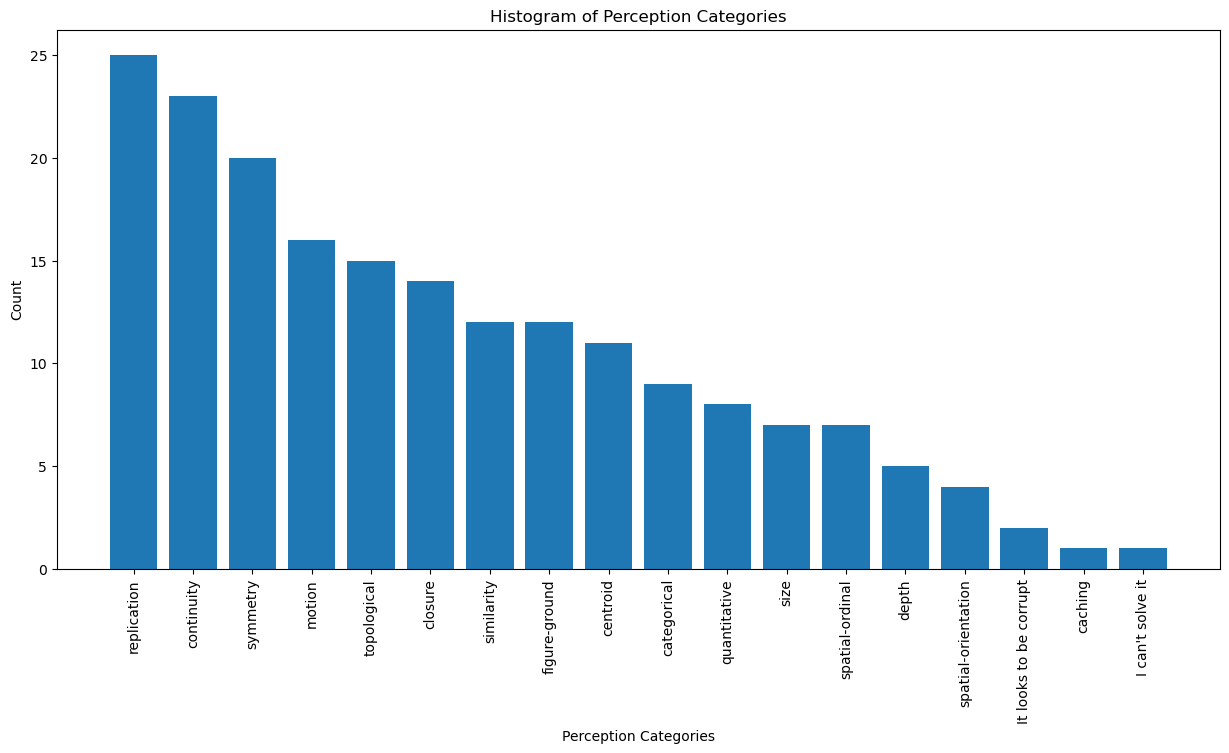

In [86]:
# Flatten the list, including nested lists
def flatten(lst):
    flattened = []
    for item in lst:
        if isinstance(item, list):
            flattened.extend(flatten(item))  # Recursively flatten nested lists
        else:
            flattened.append(item)
    return flattened

# Flatten the list_perceptions
flat_list = flatten(list_perceptions)

# Count occurrences using Counter
counts = Counter(flat_list)

sorted_counts = sorted(counts.items(), key = lambda x: x[1], reverse=True)
# Display the counts
for item, count in sorted_counts:
    print(f"{item}: {count}")

# Plot histogram
plt.figure(figsize=(15, 7))
categories, occurences = zip(*sorted_counts)
plt.bar(categories,occurences)
plt.xticks(rotation=90)
plt.xlabel('Perception Categories')
plt.ylabel('Count')
plt.title('Histogram of Perception Categories')
plt.show()

In [79]:
# Set the desired working directory
os.chdir("/home/jdelinea/ARC-AGI/BARC")
directory_path = "arc/train_problems"

dic = create_arc_training_tasks(directory_path,list_perceptions)

In [80]:
print(len(dic))


150


In [81]:
from typing import List

def plot_arc_train_data(train_data: List[dict], id: str = None, label: str = None) -> None:
    """
    Plots input-output pairs from the 'train' data in horizontal layout.
    """
    cmap = ListedColormap([
        '#000000', '#0074D9', '#FF4136', '#2ECC40', '#FFDC00',
        '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'
    ])
    args = {'cmap': cmap, 'vmin': 0, 'vmax': 10}
    
    # Number of examples
    n_examples = len(train_data)
    fig_width = n_examples * 3  # Scale for horizontal spacing
    fig_height = 3
    
    # Create a figure with 2 rows (input-output) and n_examples columns
    fig, axes = plt.subplots(2, n_examples, figsize=(fig_width, fig_height))
    
    # Ensure axes is always a 2D array
    if n_examples == 1:
        axes = axes[:, np.newaxis]
    
    for col, example in enumerate(train_data):
        input_grid = np.array(example['input'])
        output_grid = np.array(example['output'])
        
        # Plot input
        axes[0, col].imshow(input_grid, **args)
        axes[0, col].axis('off')
        
        # Plot output
        axes[1, col].imshow(output_grid, **args)
        axes[1, col].axis('off')
    
    fig.suptitle(f"Task: {id} and perceptions: {label}")
    plt.tight_layout()
    plt.show()

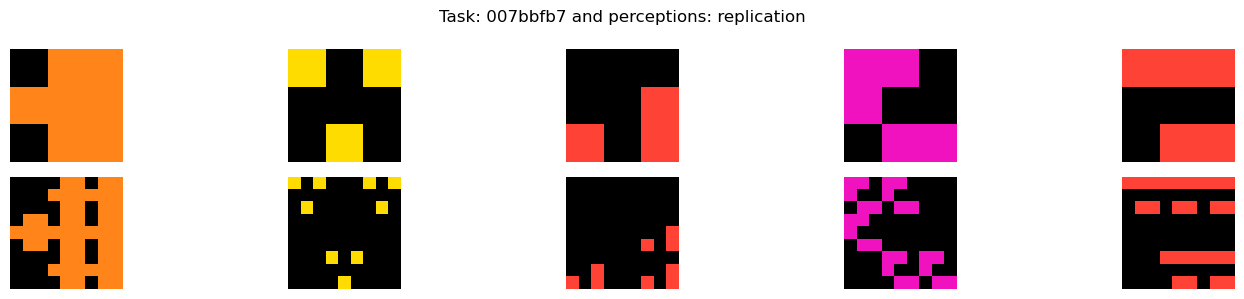

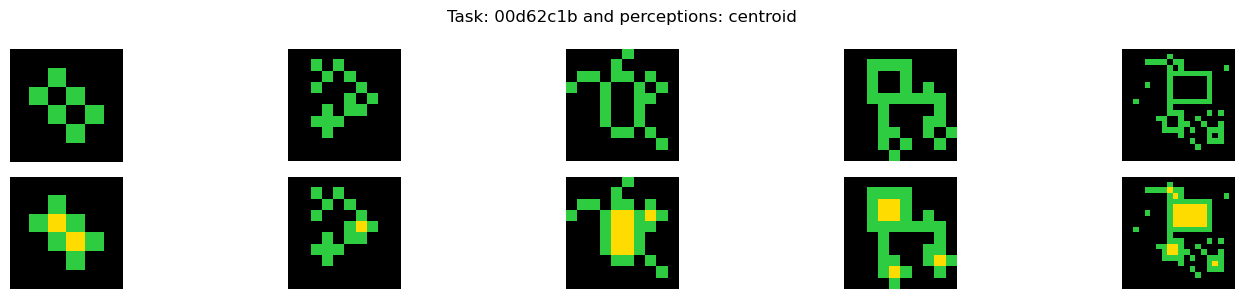

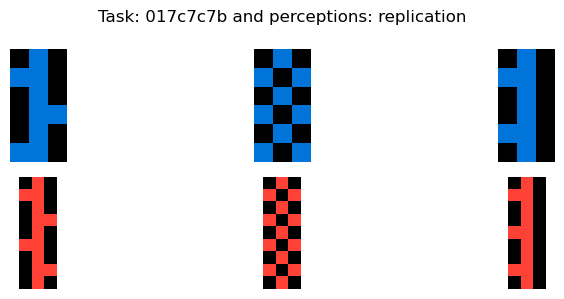

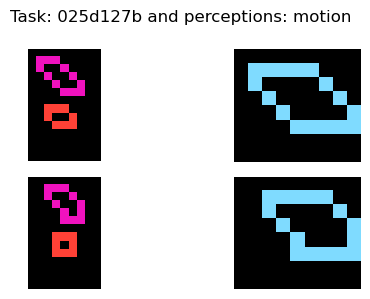

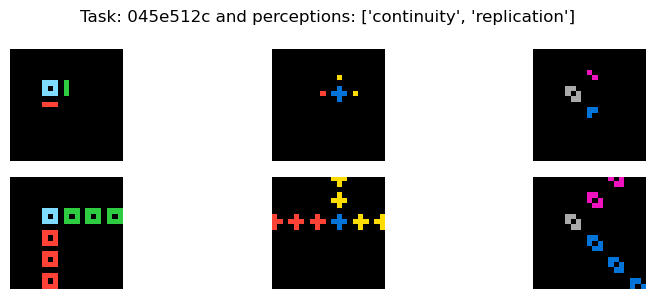

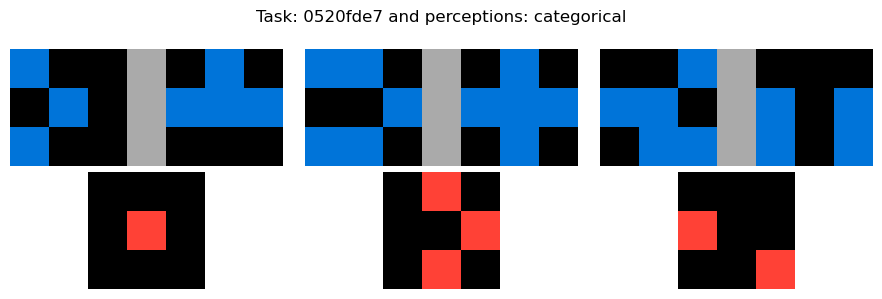

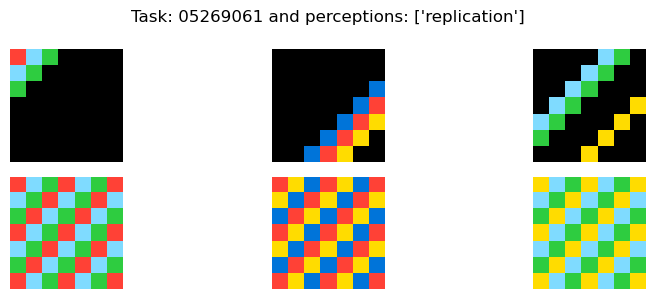

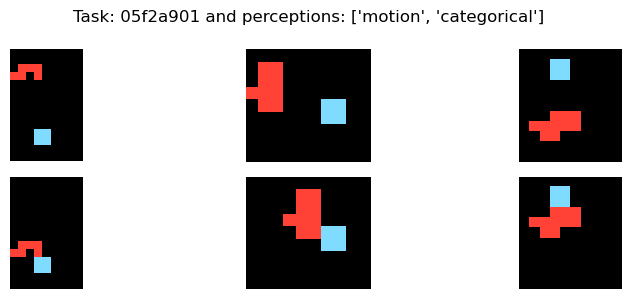

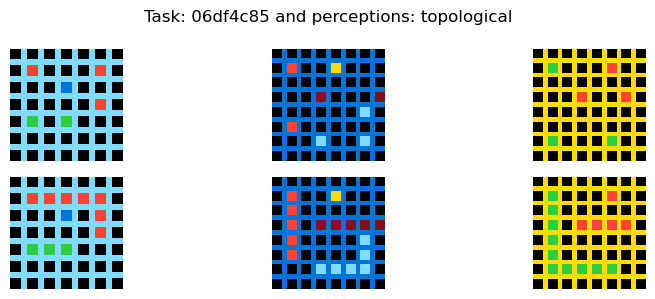

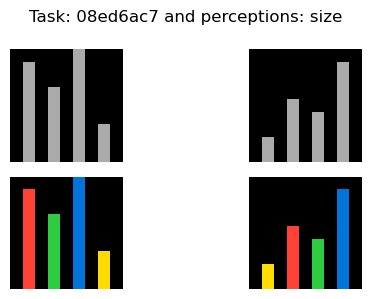

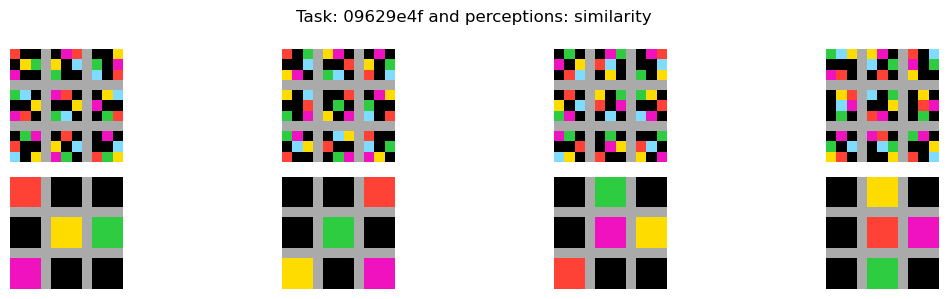

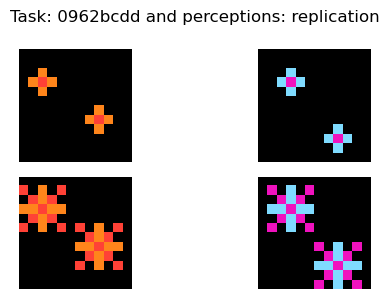

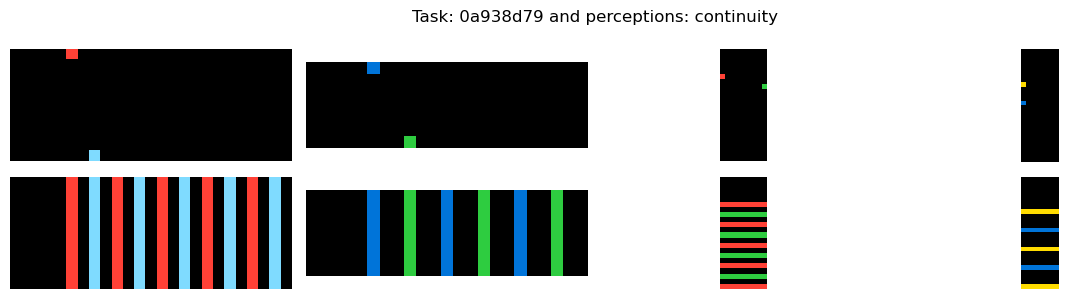

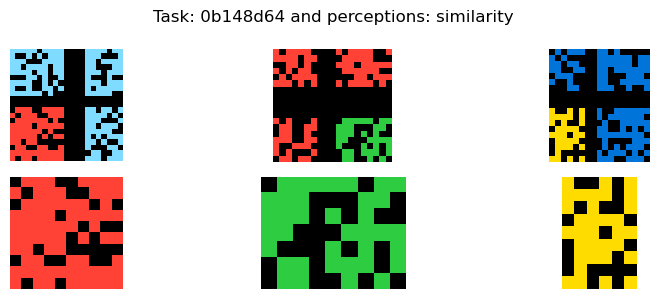

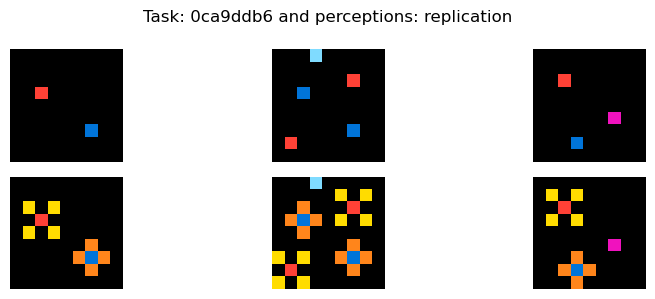

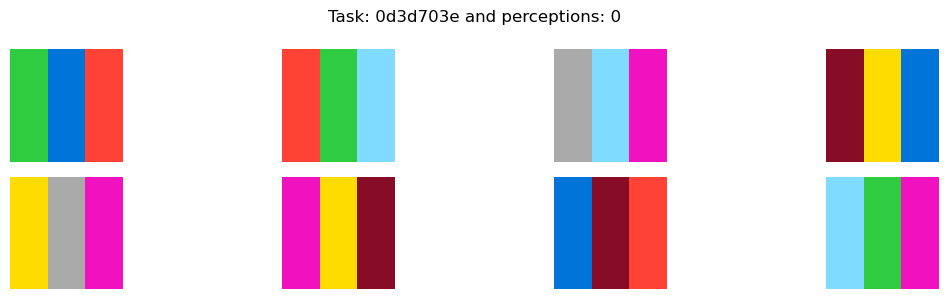

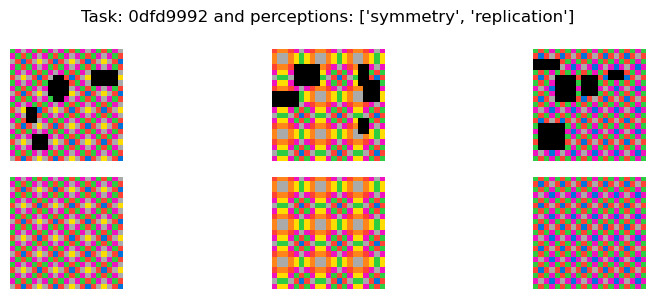

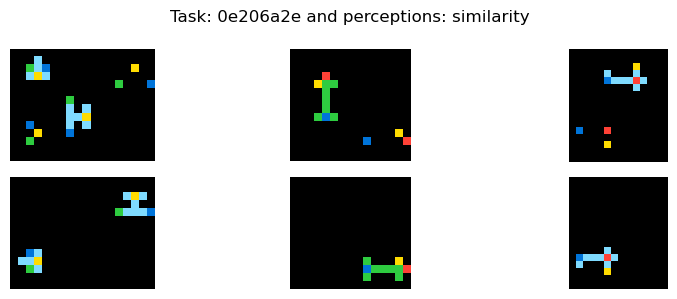

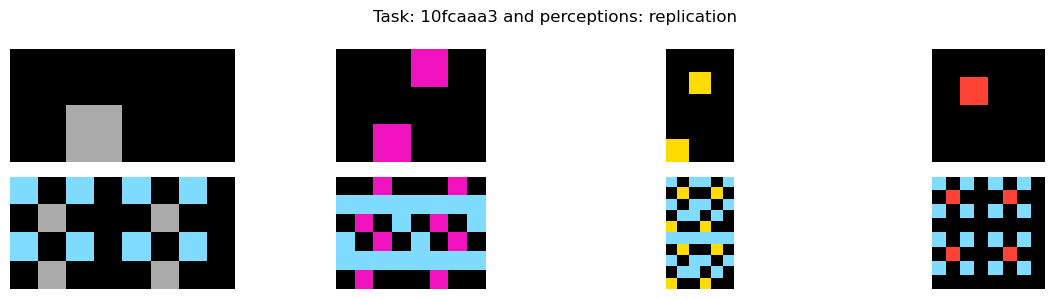

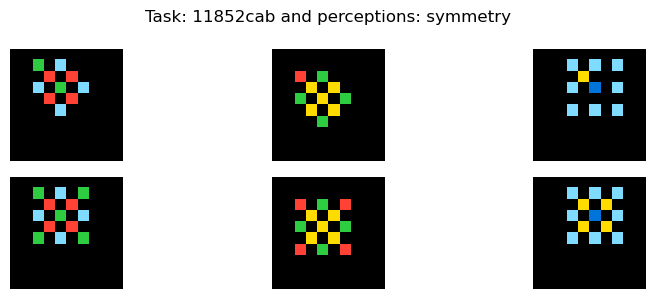

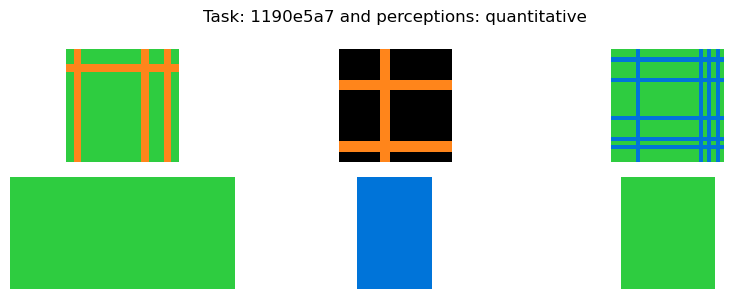

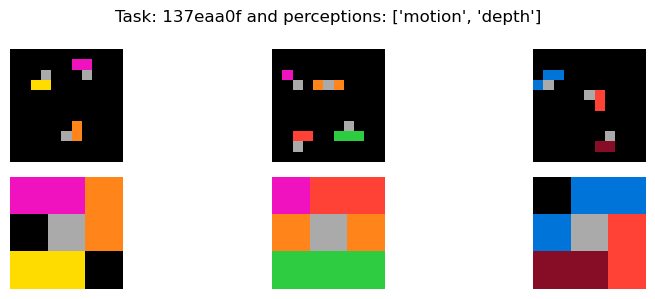

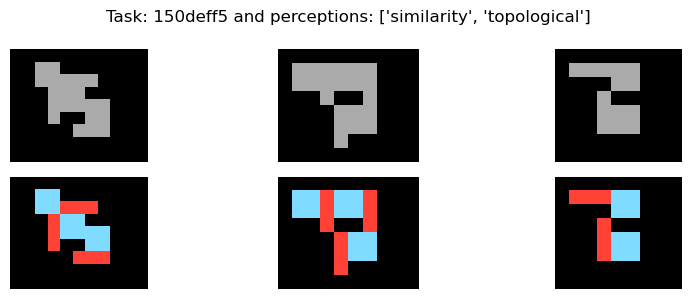

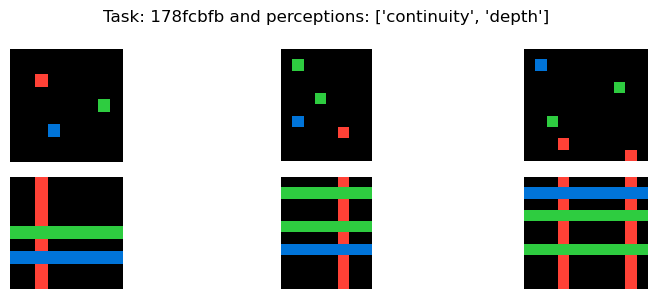

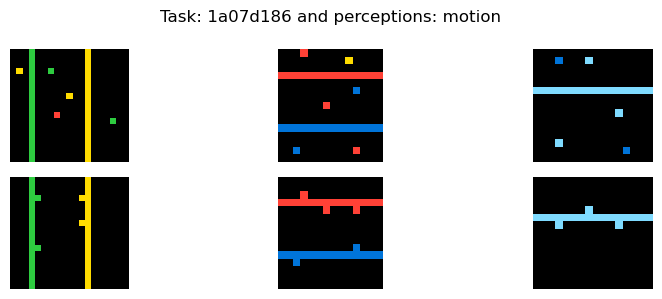

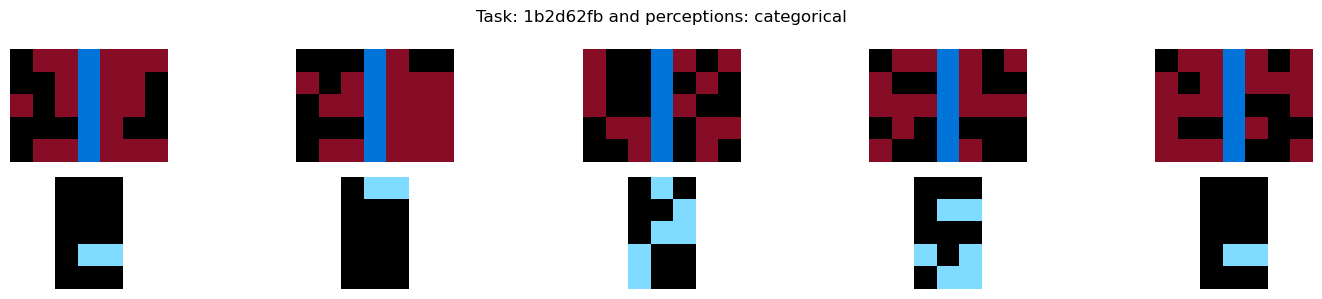

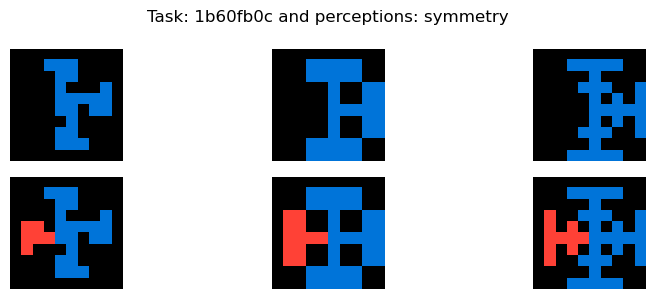

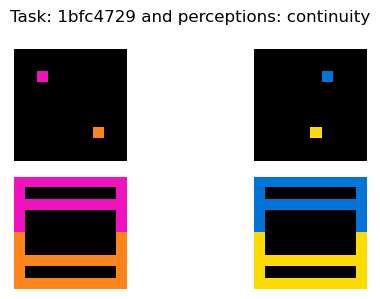

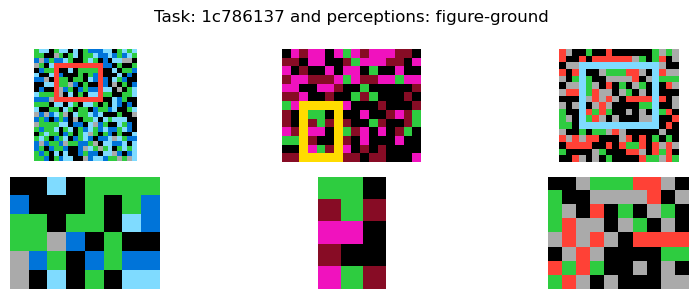

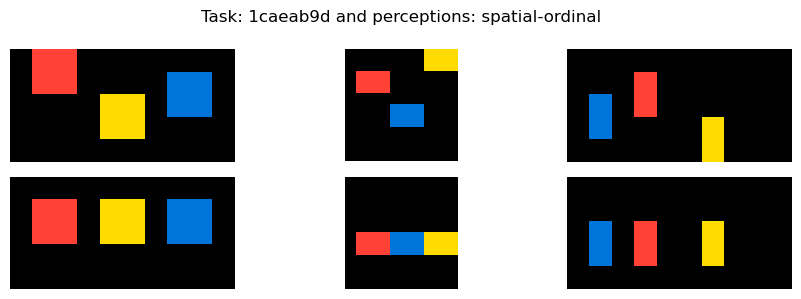

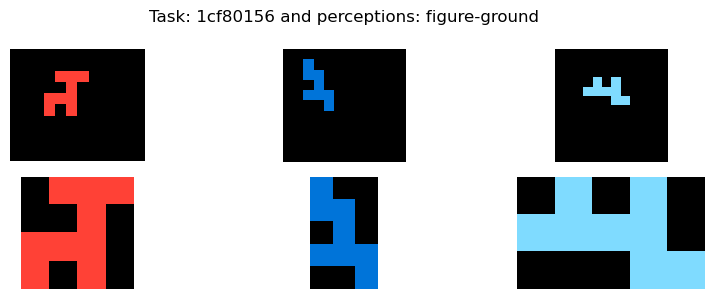

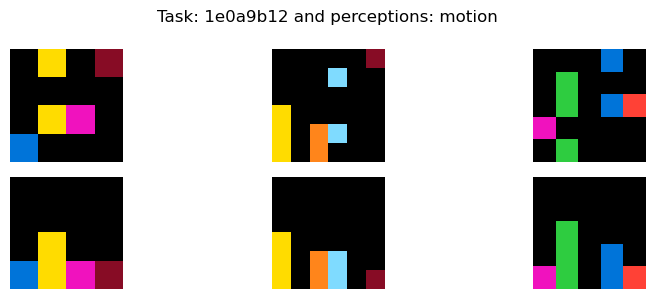

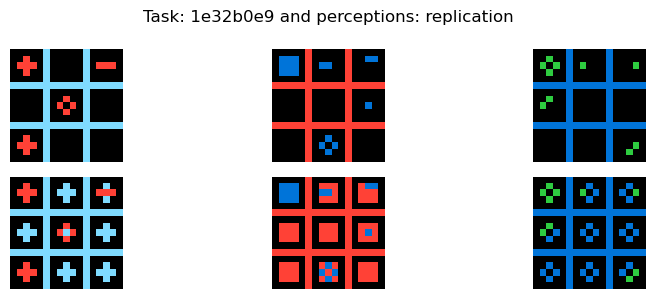

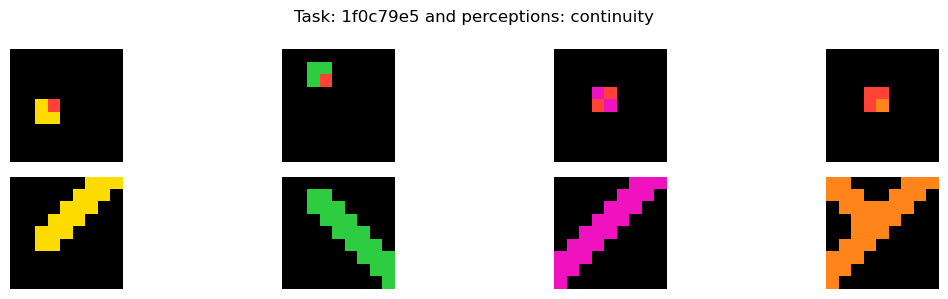

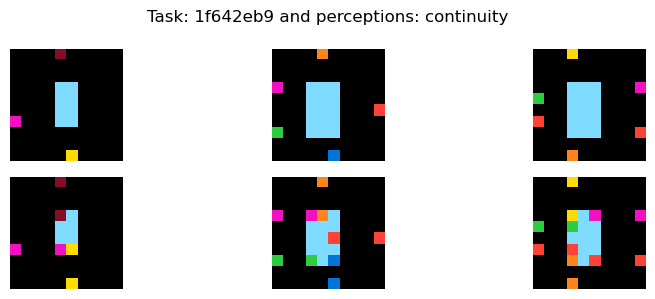

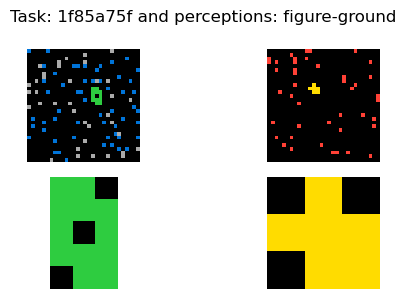

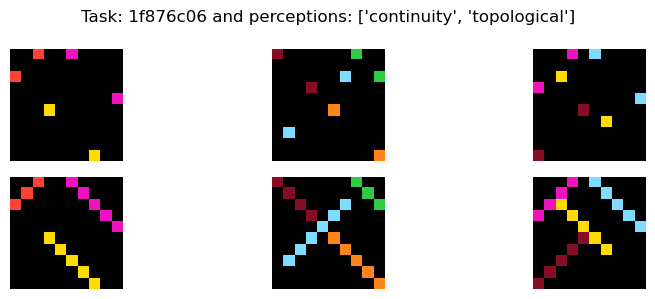

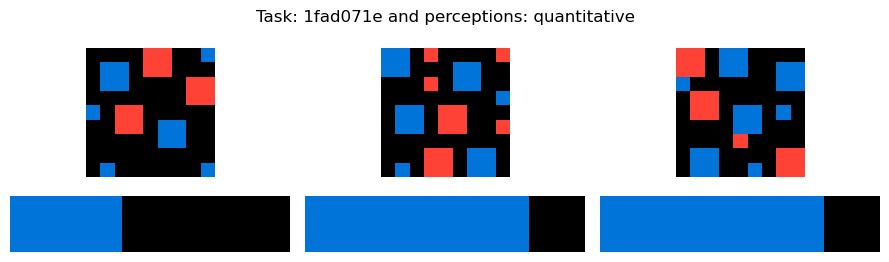

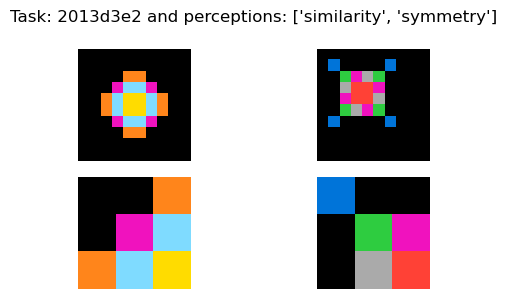

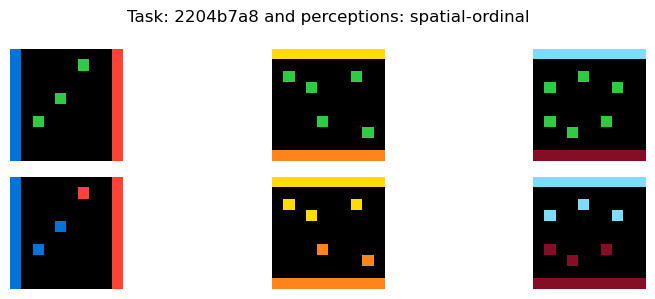

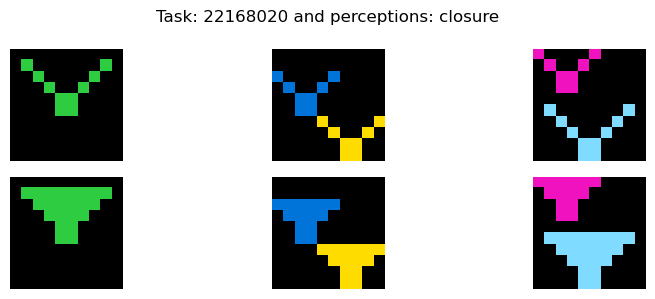

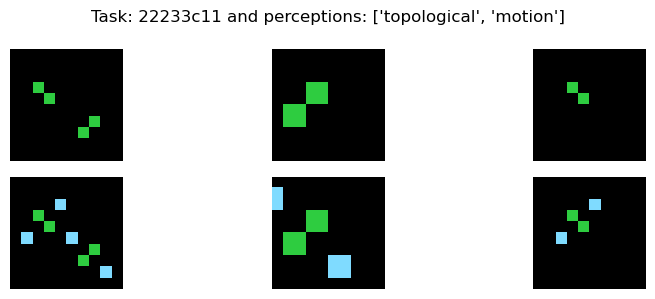

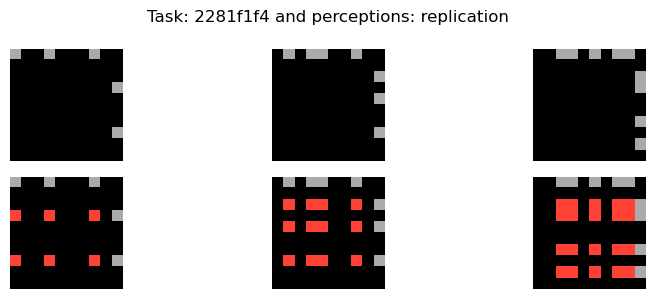

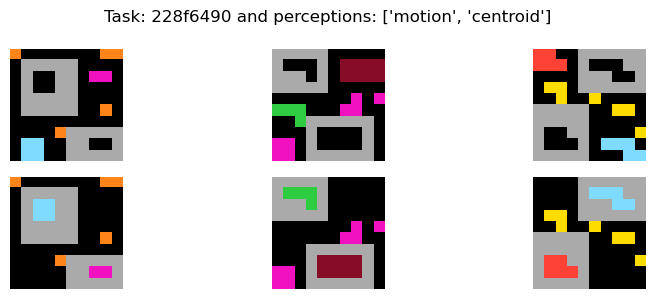

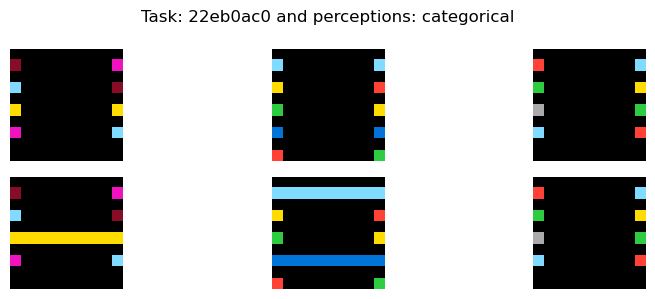

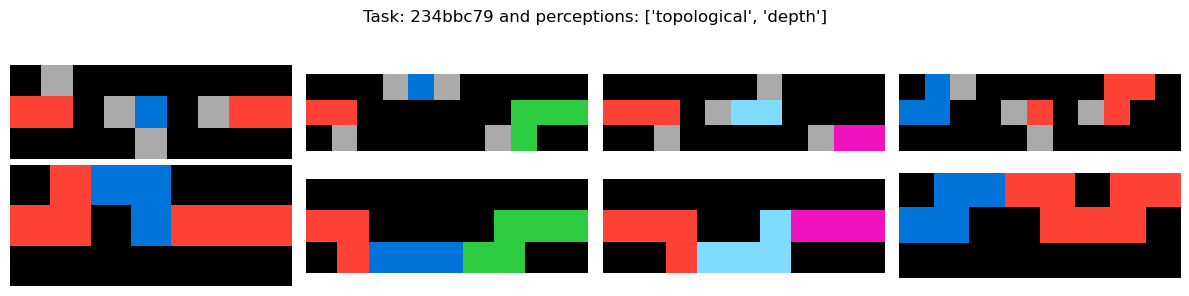

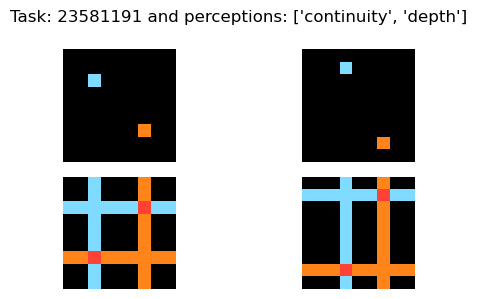

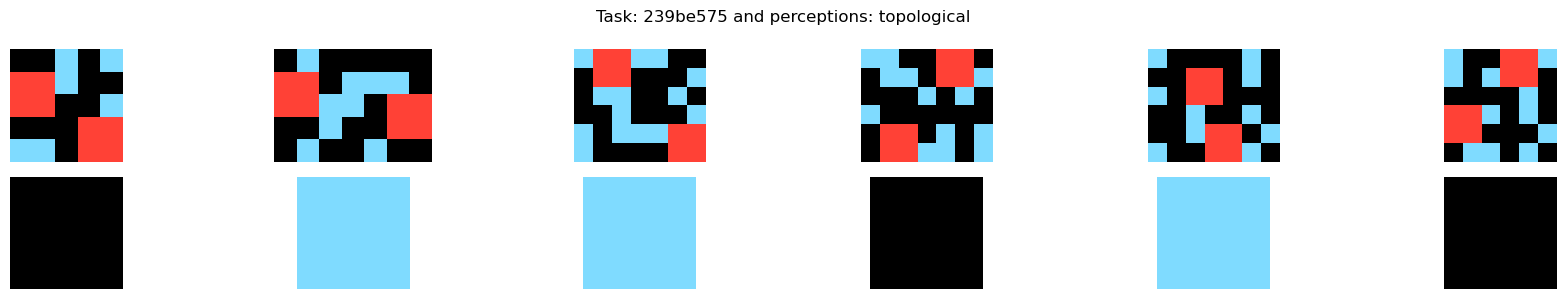

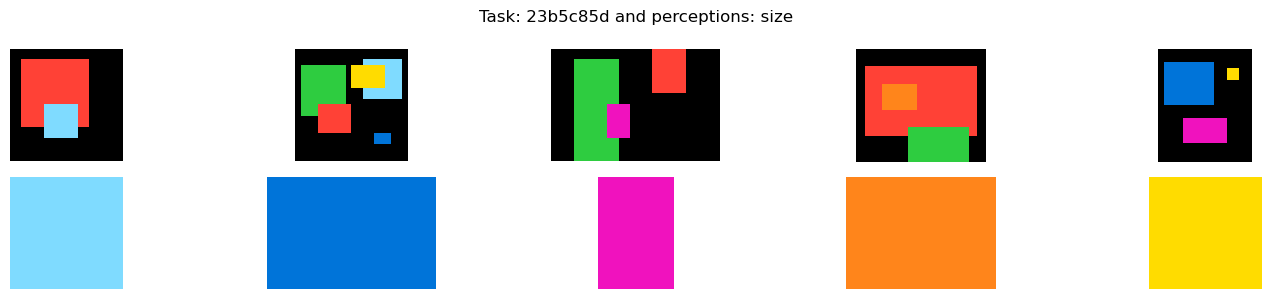

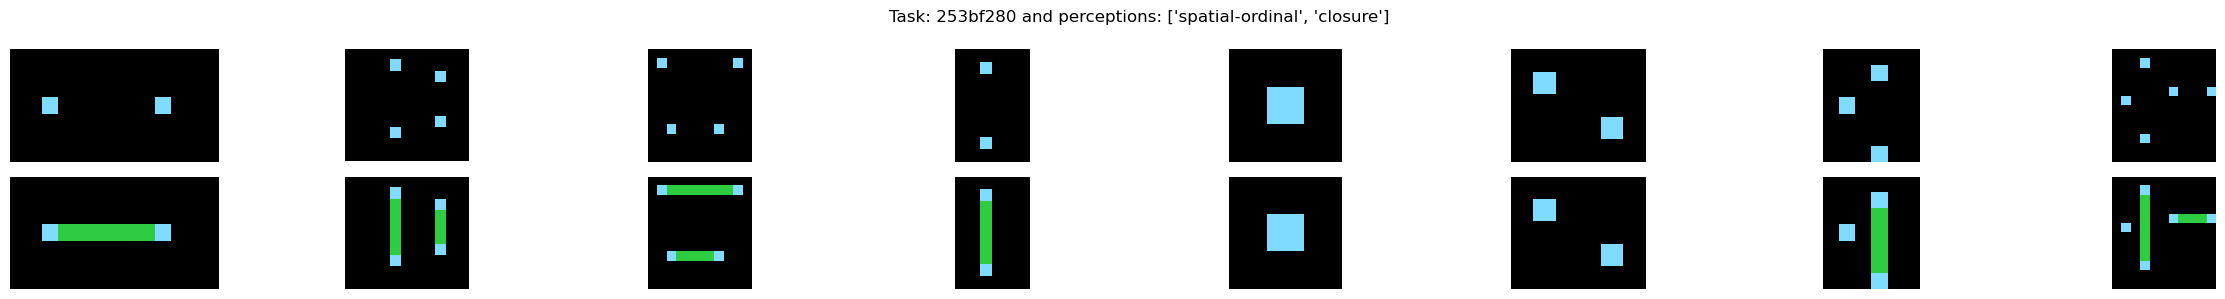

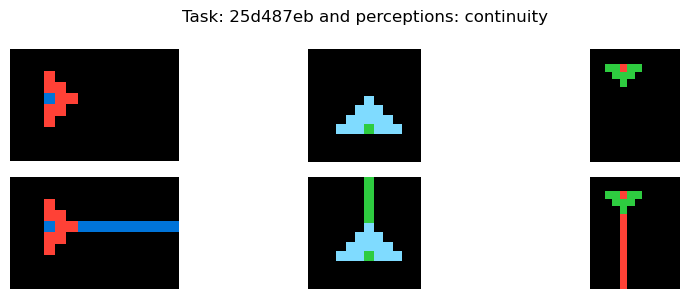

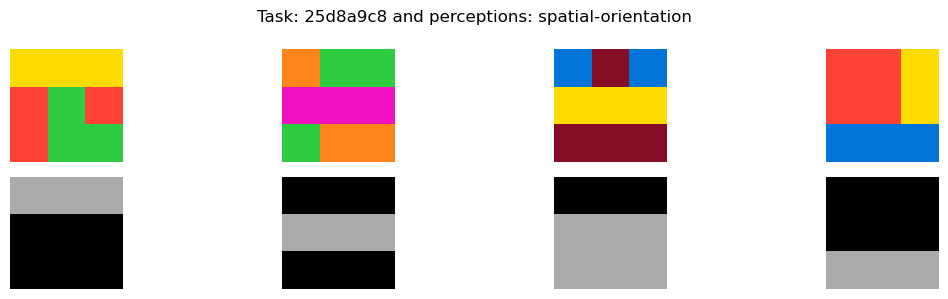

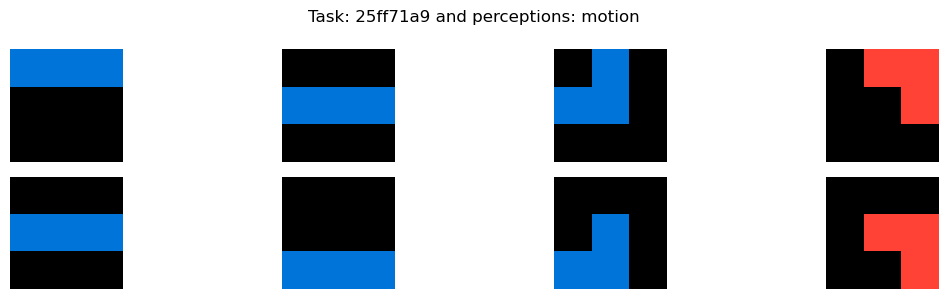

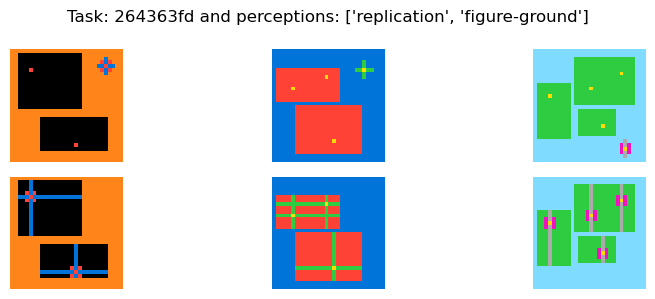

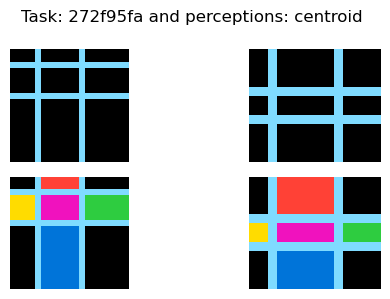

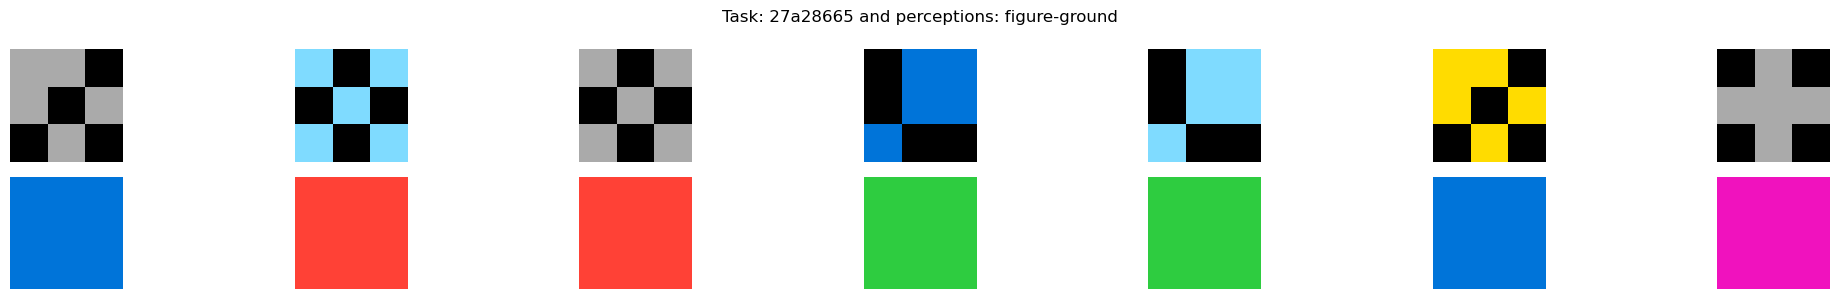

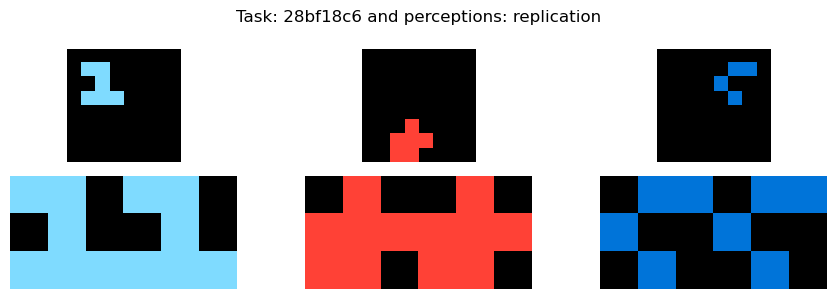

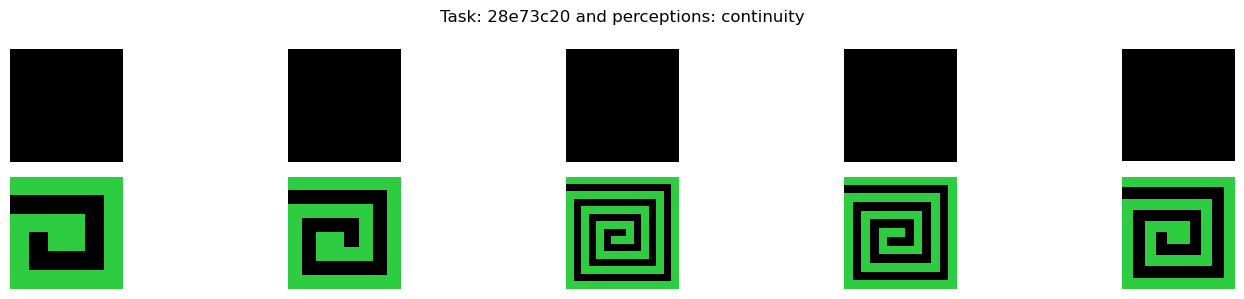

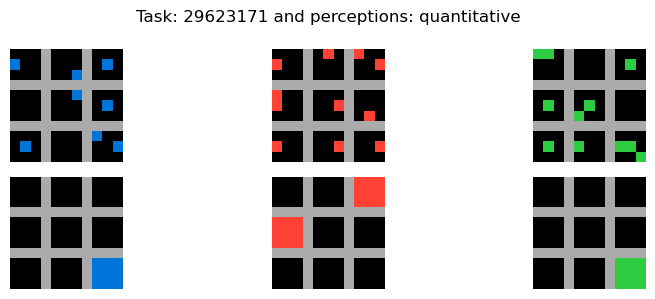

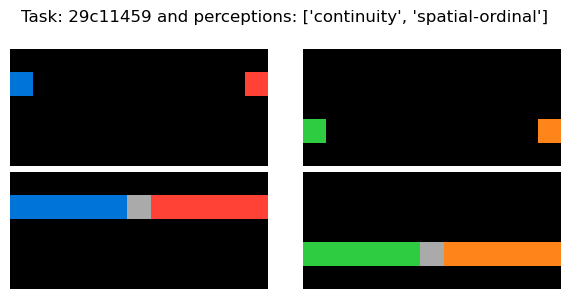

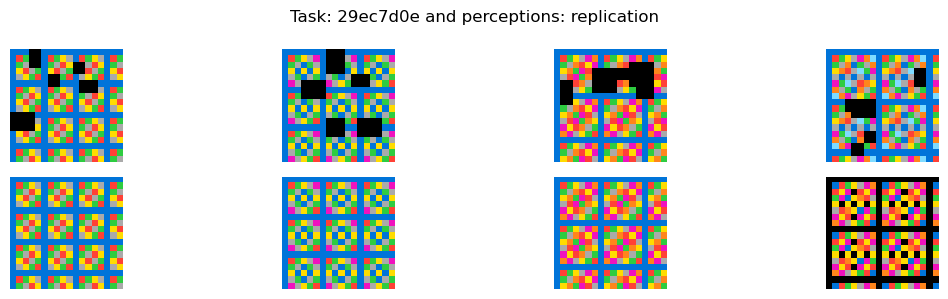

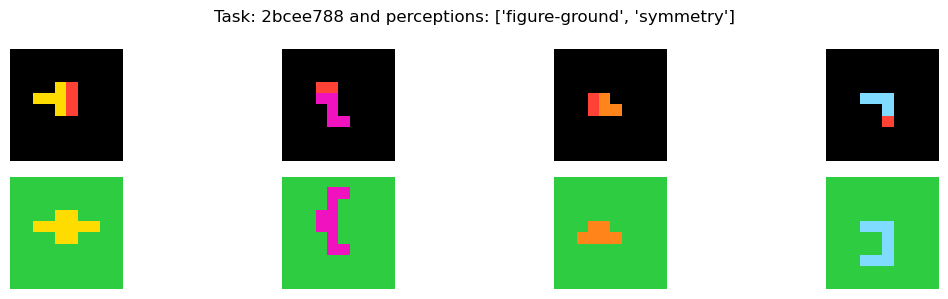

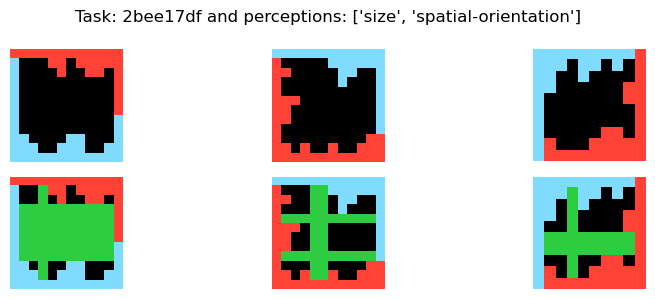

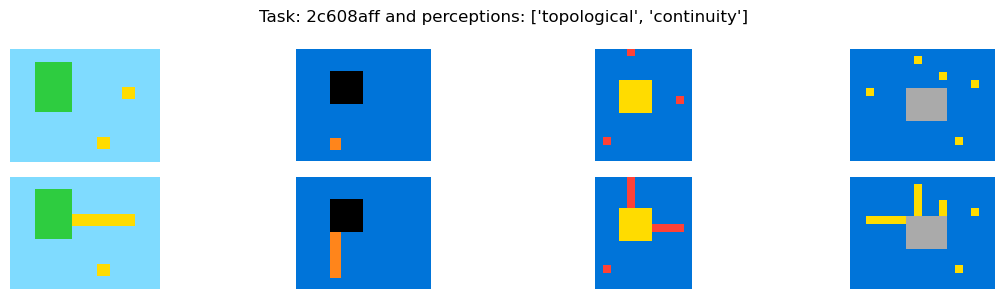

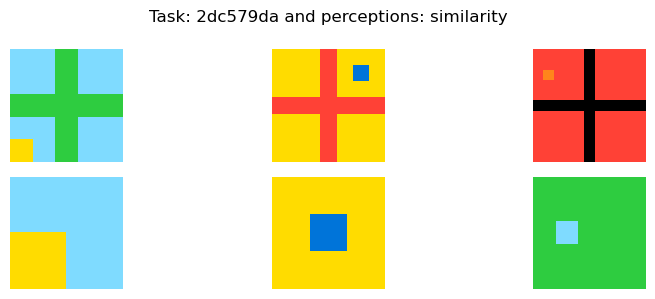

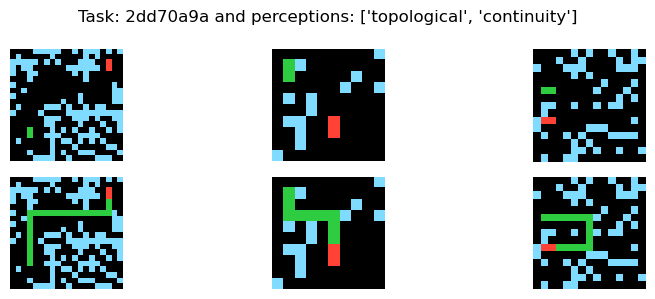

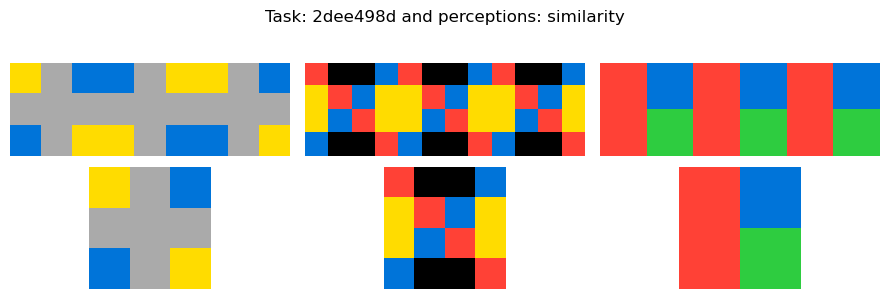

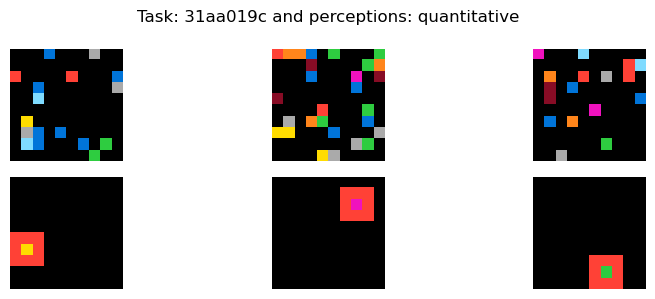

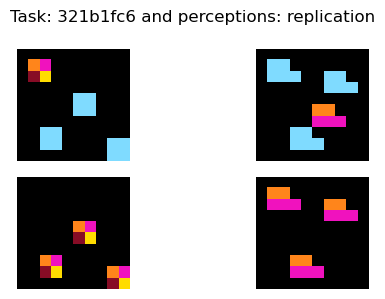

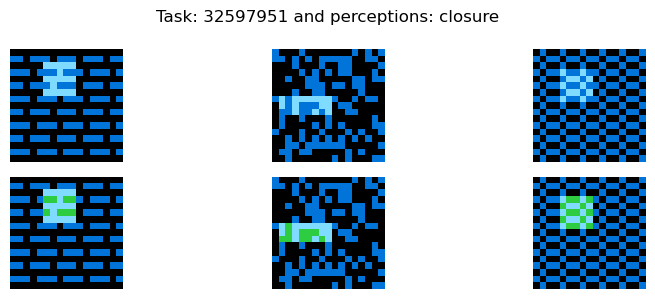

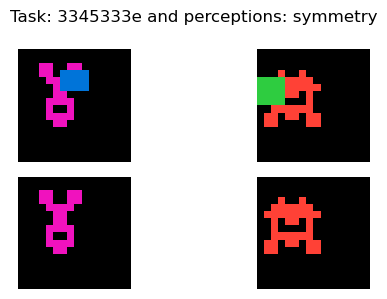

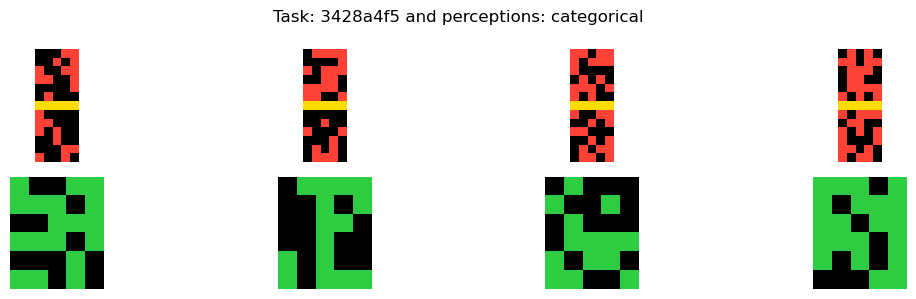

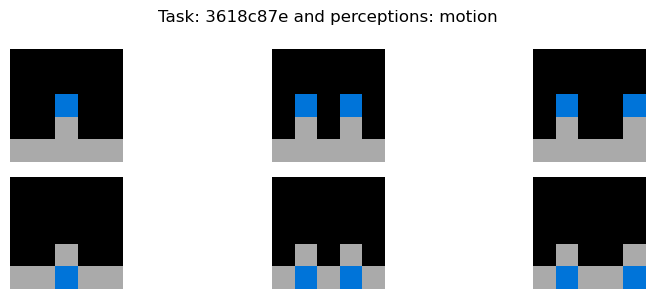

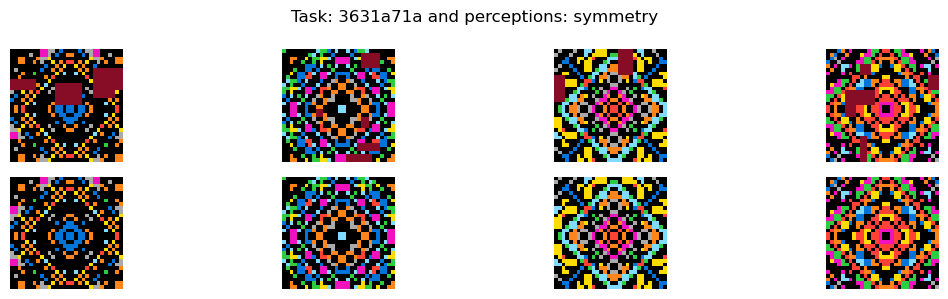

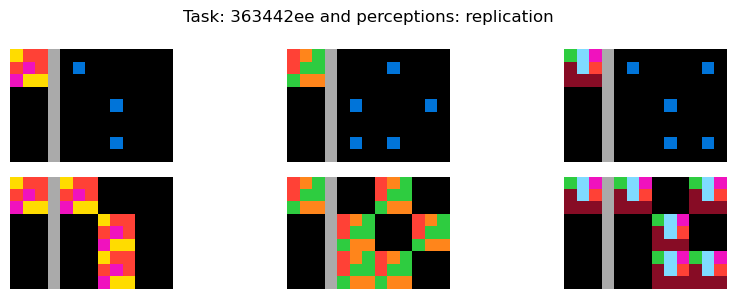

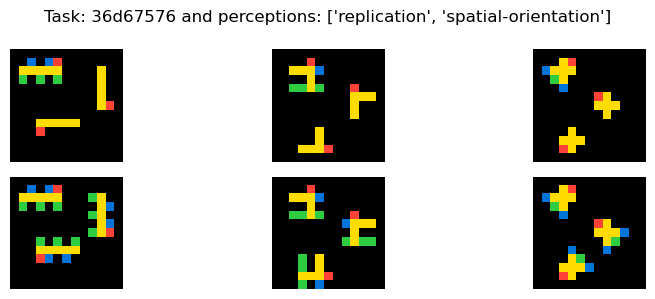

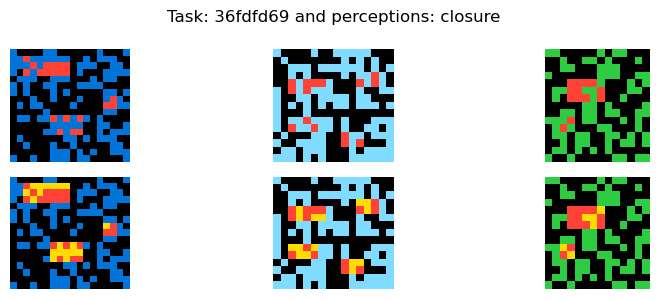

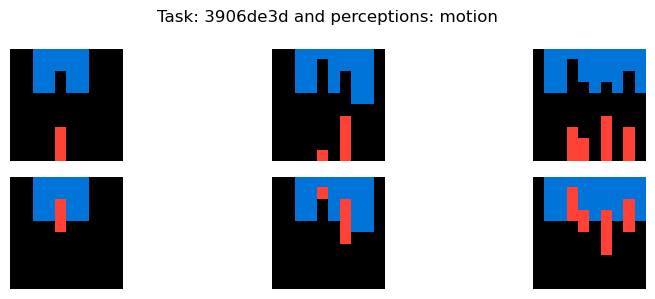

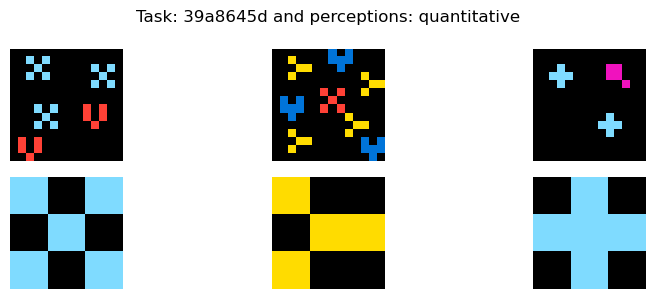

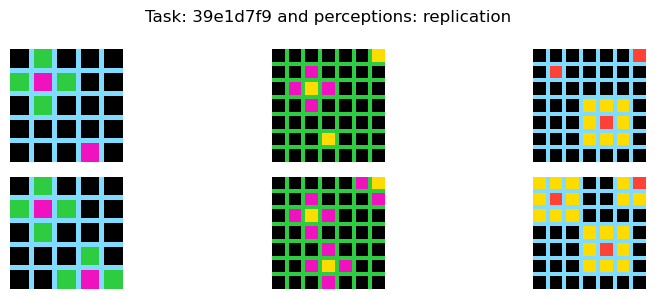

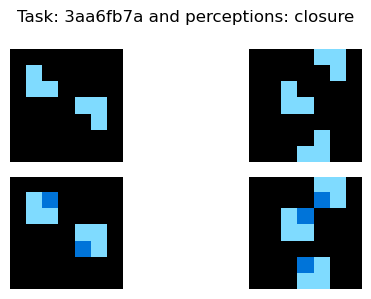

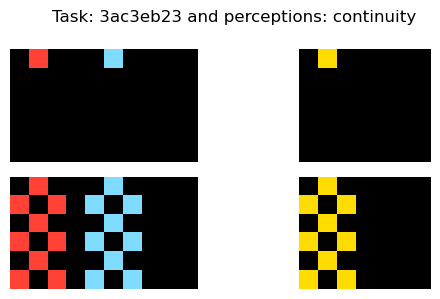

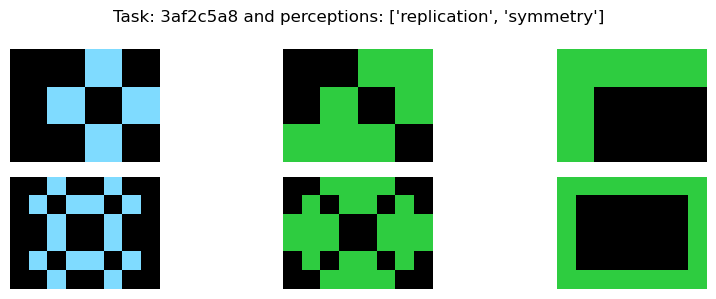

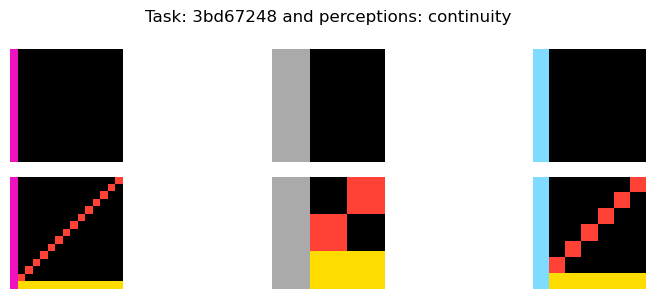

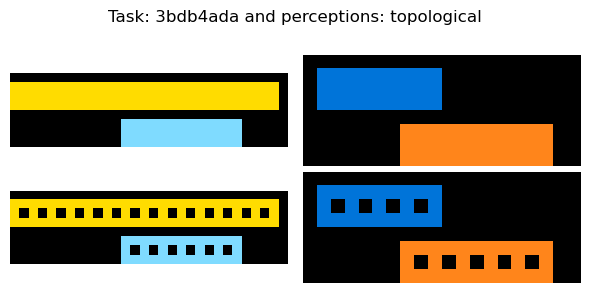

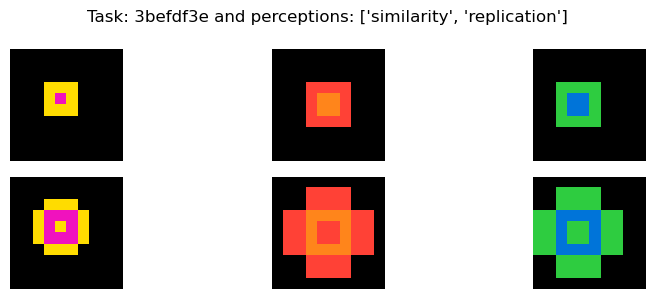

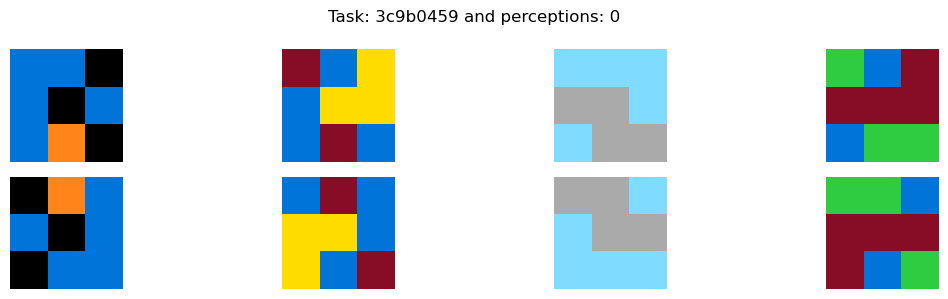

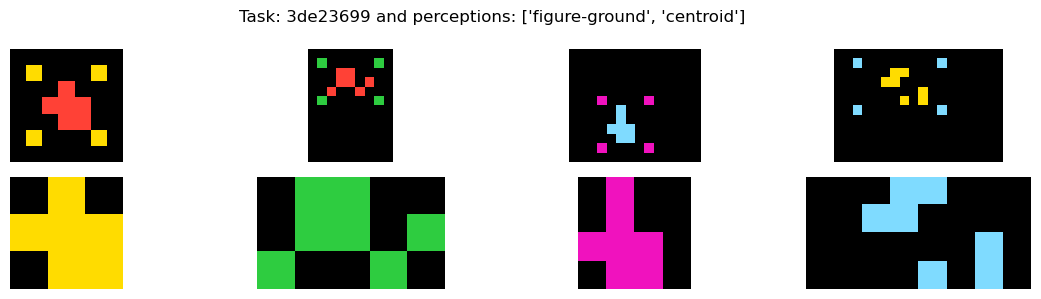

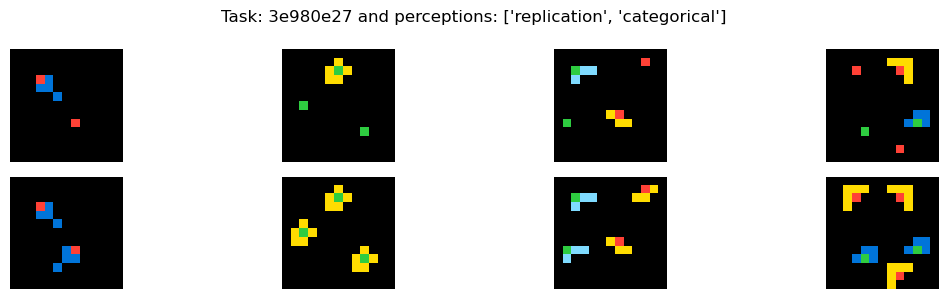

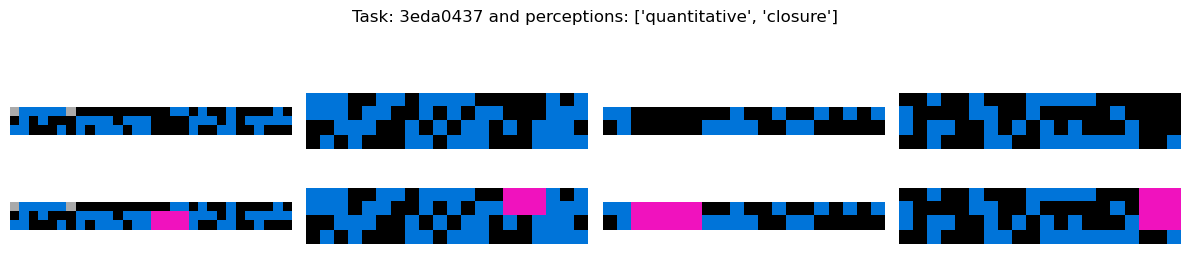

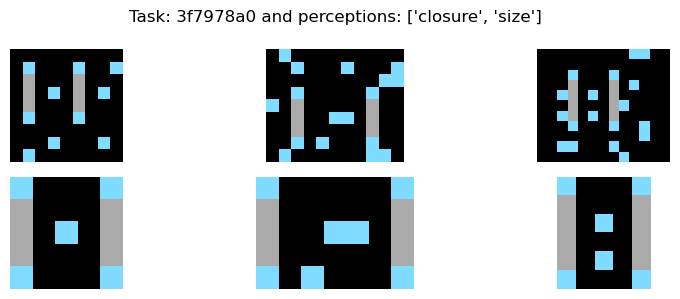

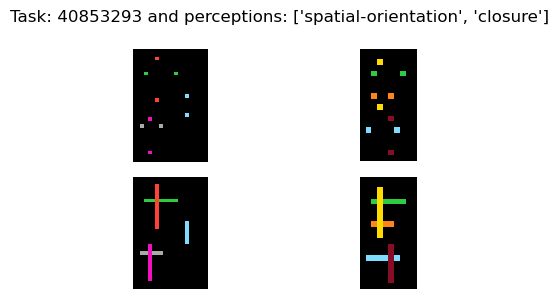

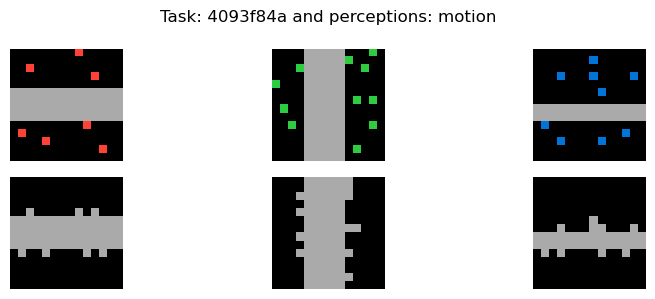

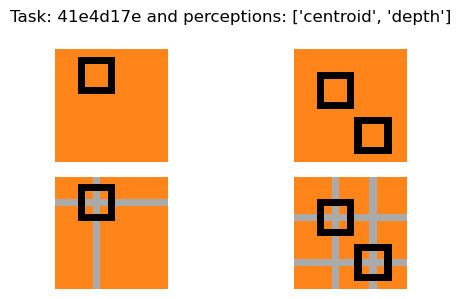

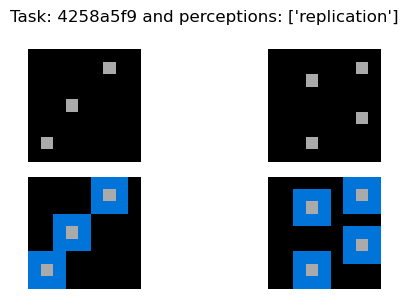

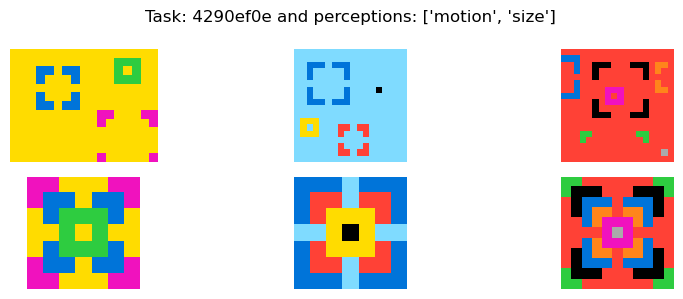

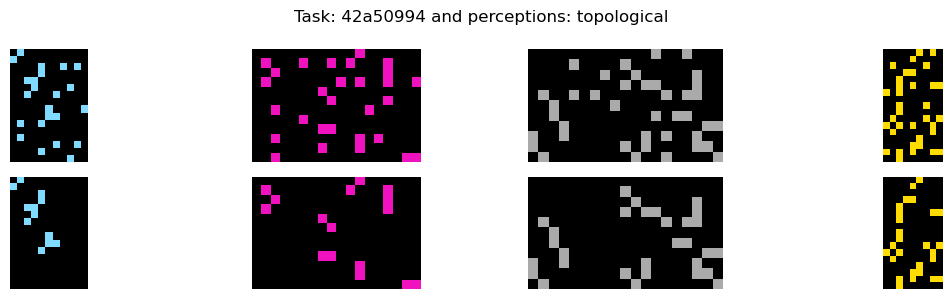

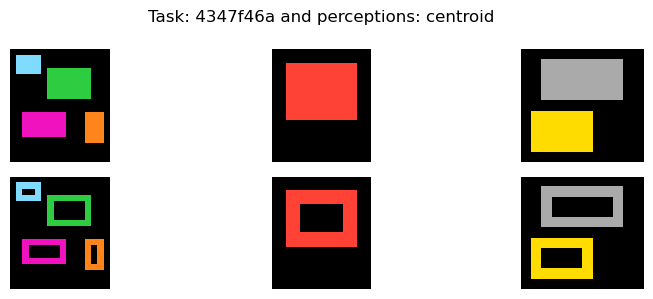

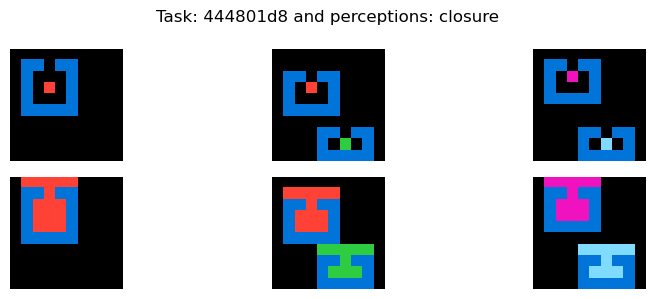

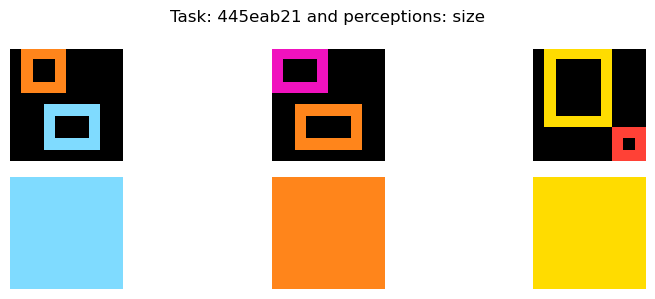

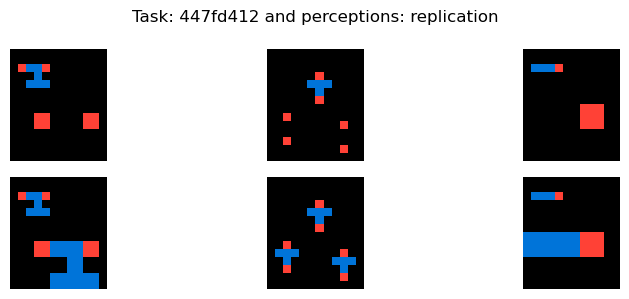

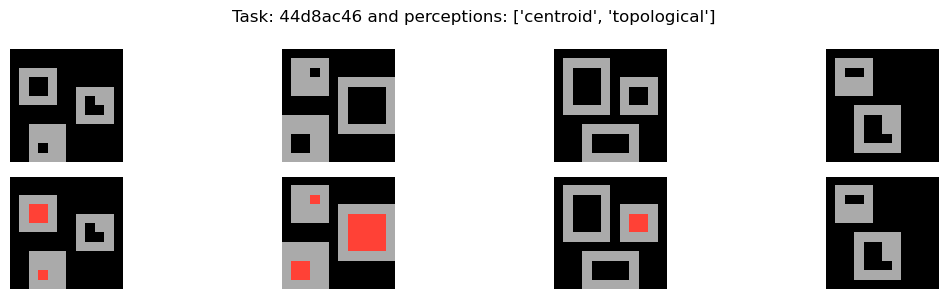

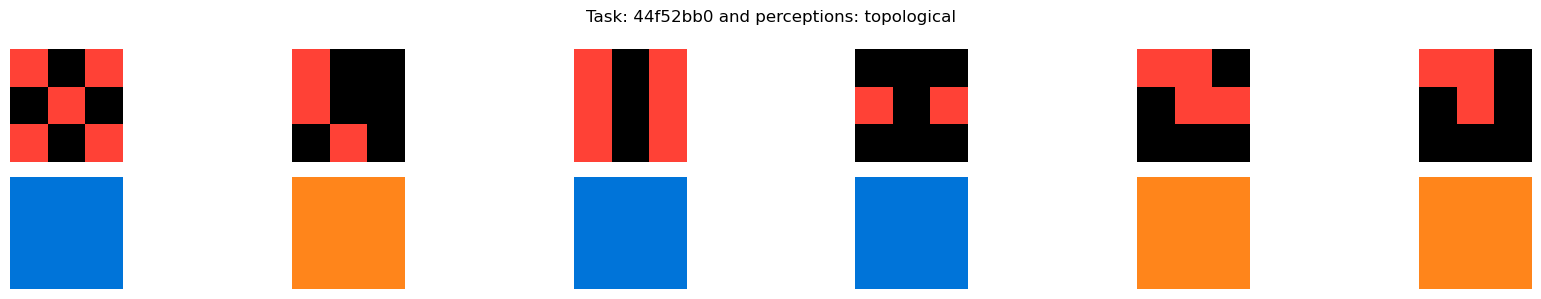

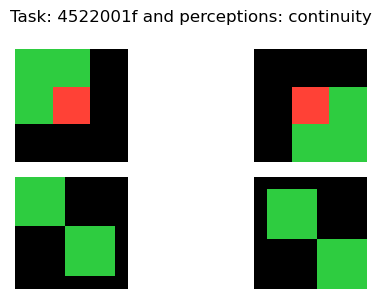

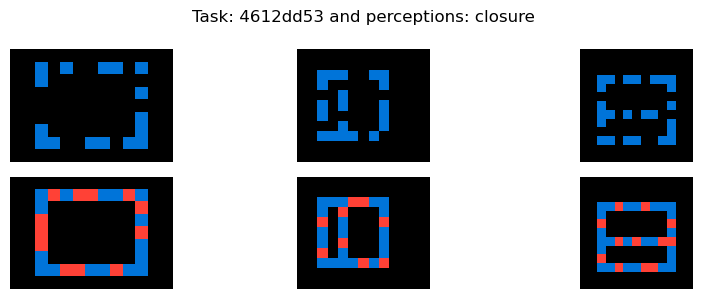

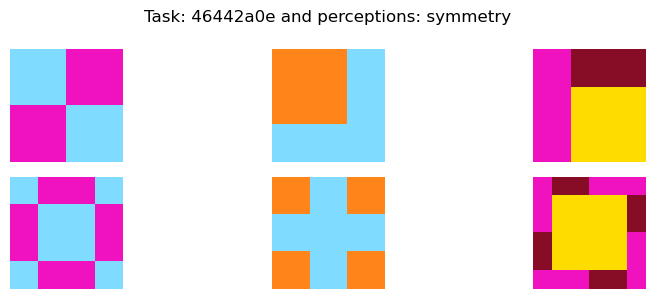

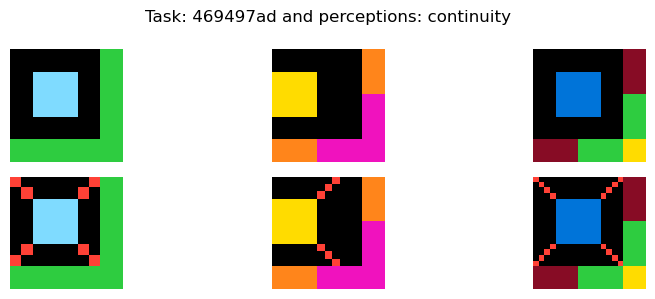

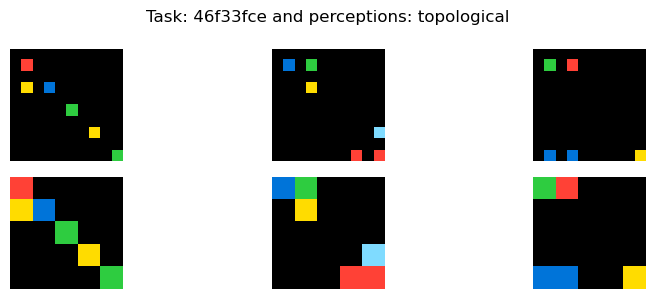

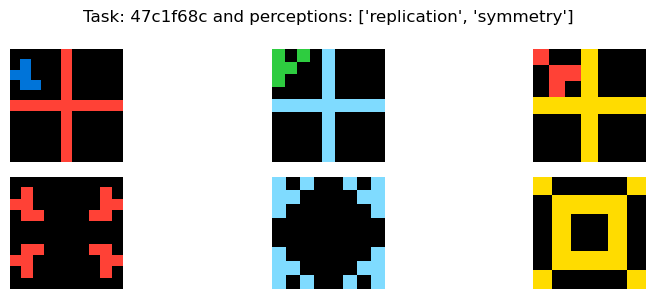

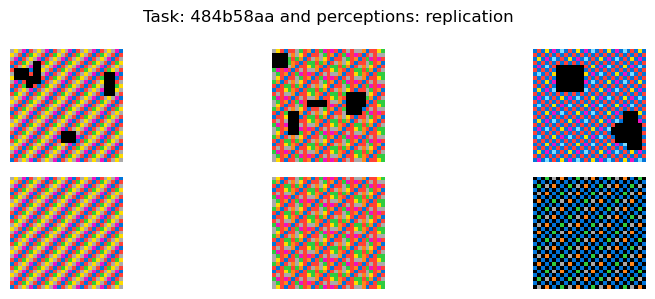

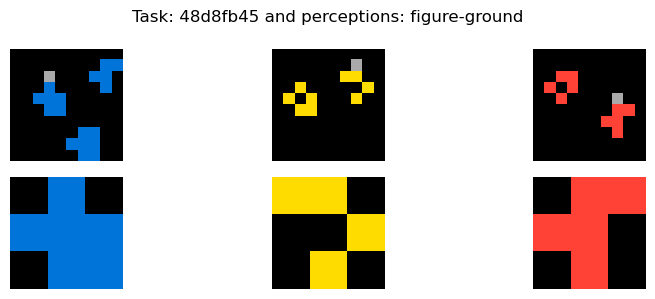

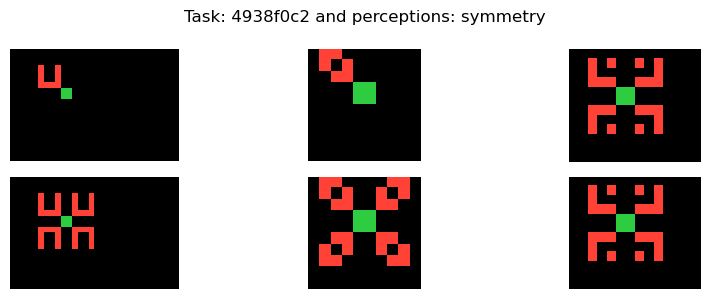

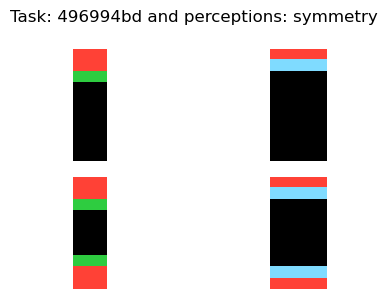

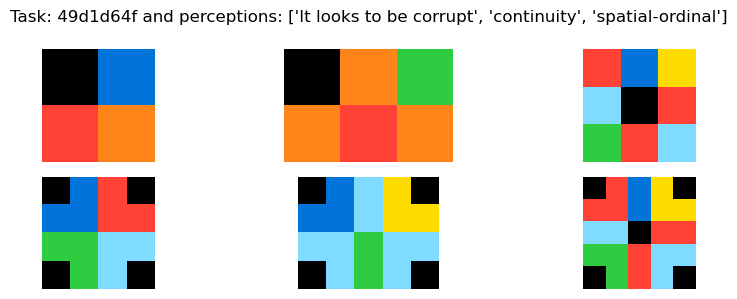

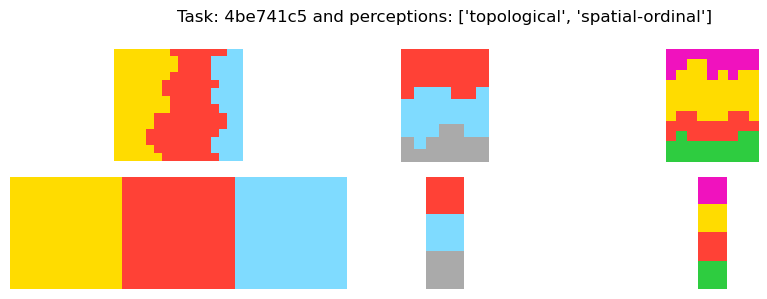

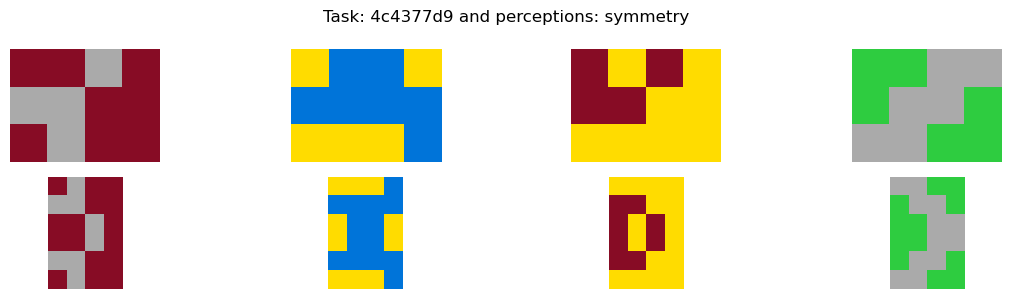

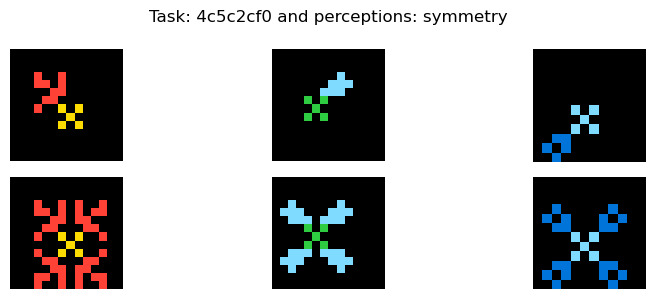

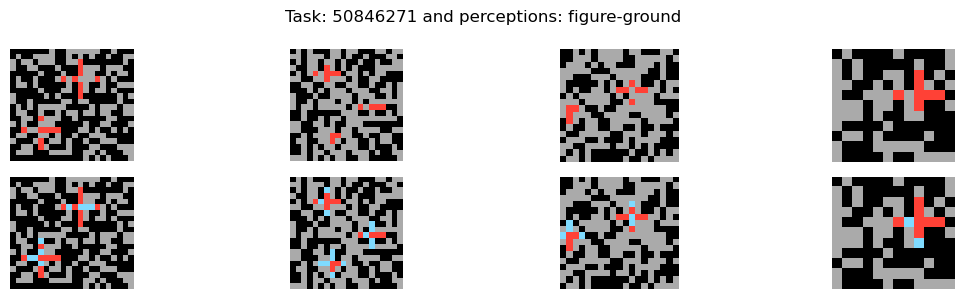

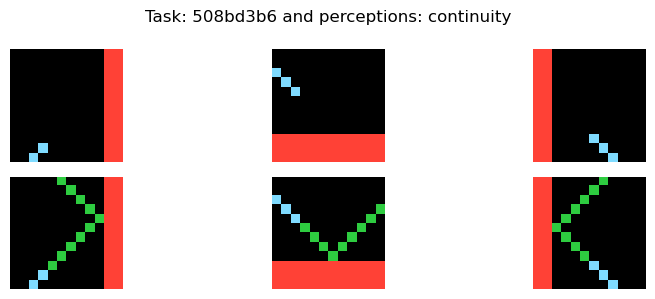

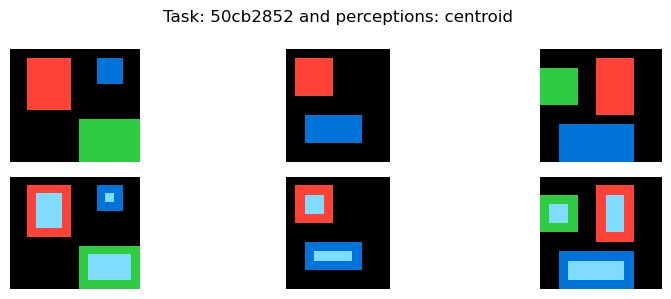

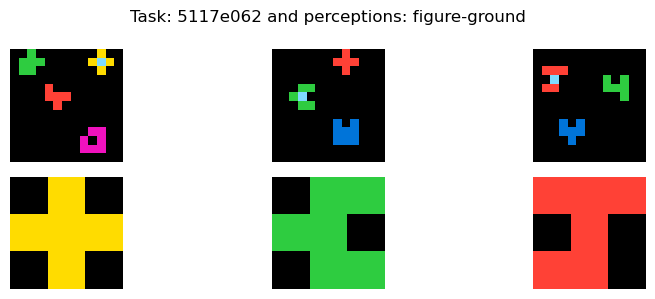

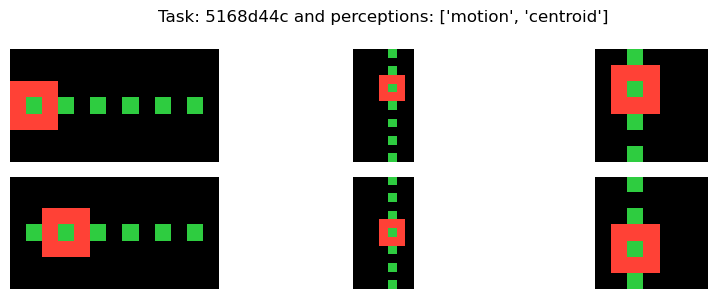

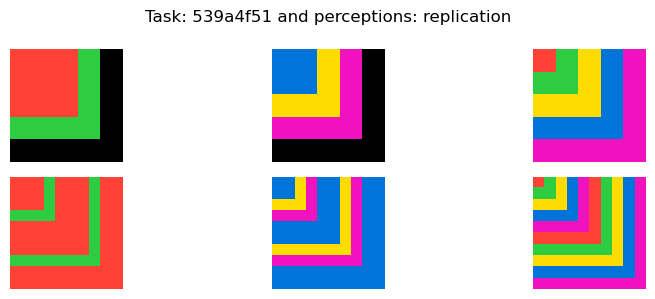

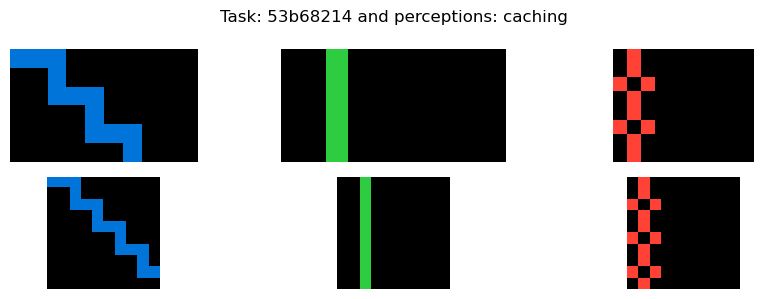

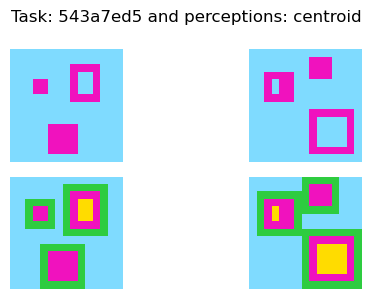

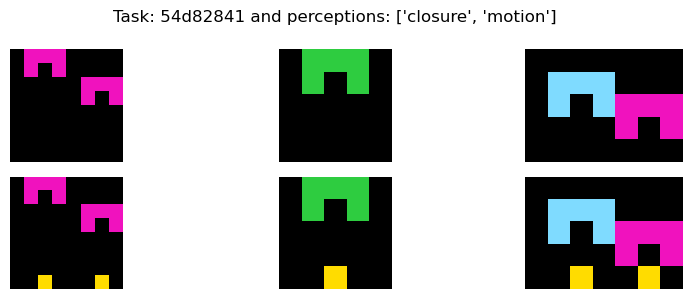

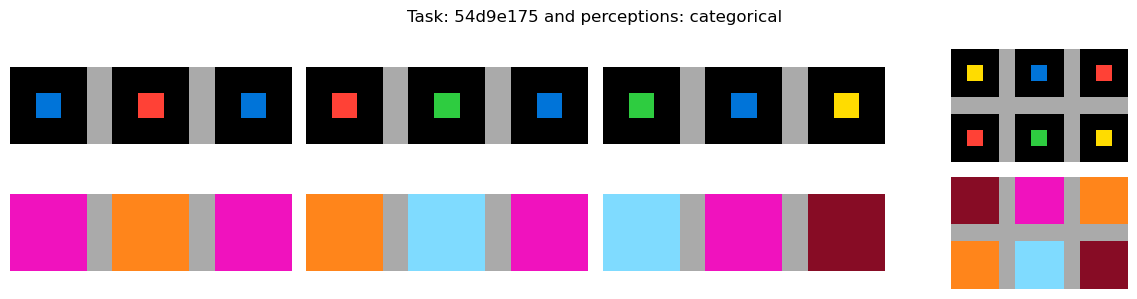

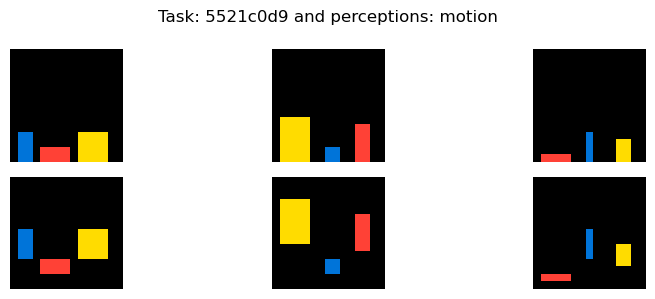

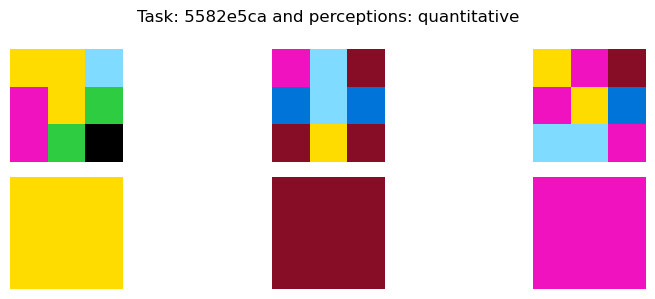

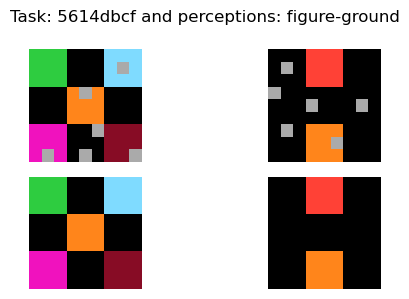

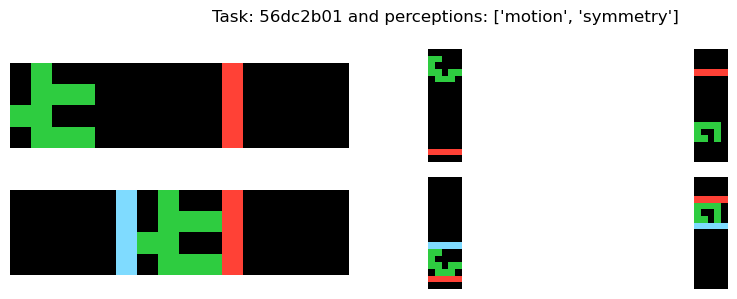

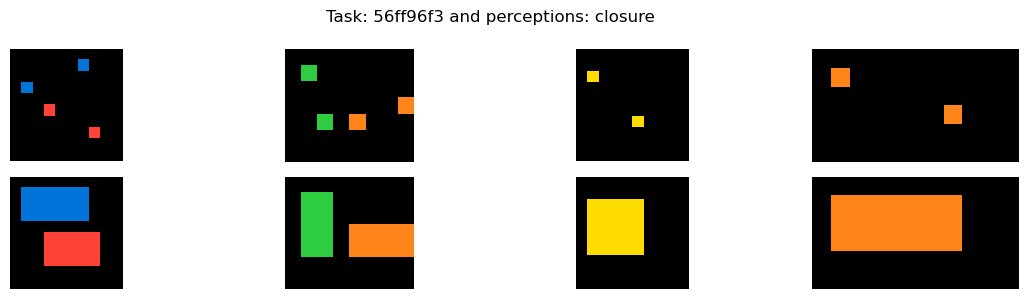

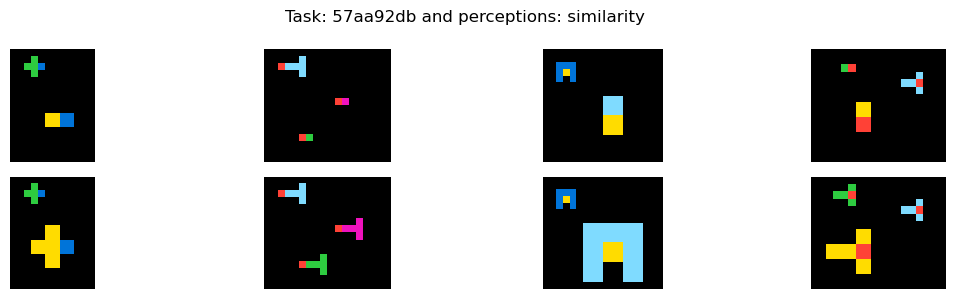

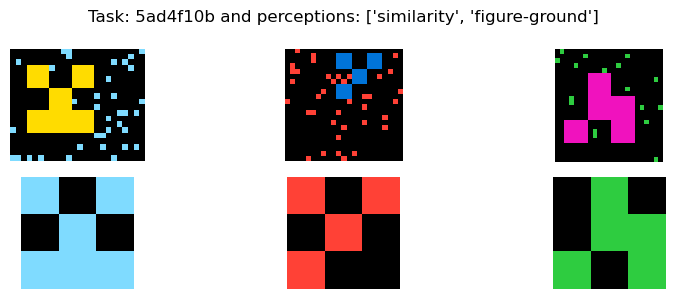

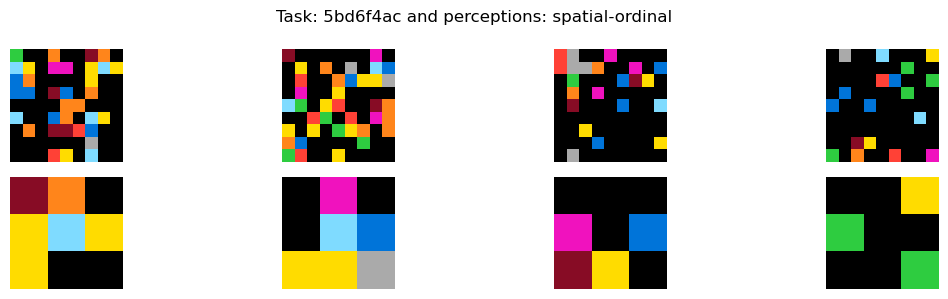

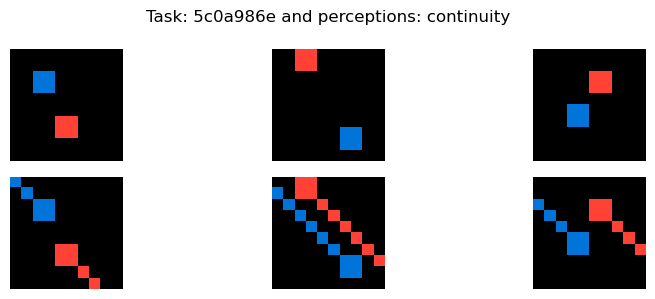

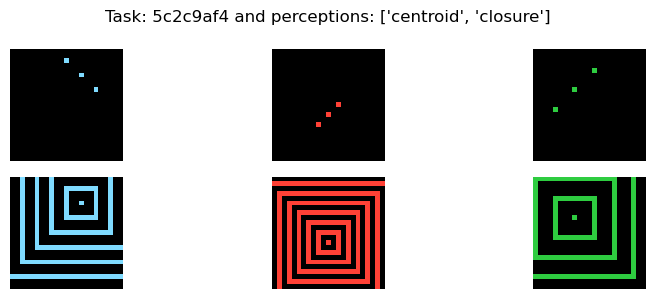

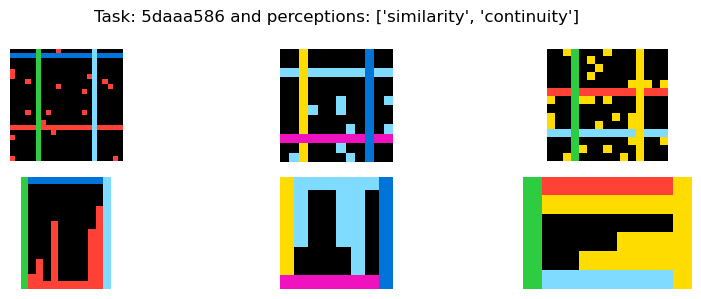

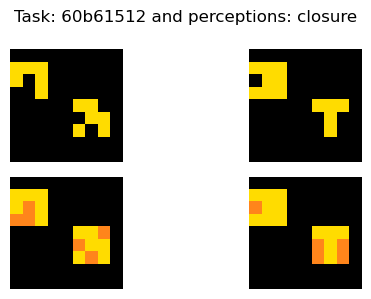

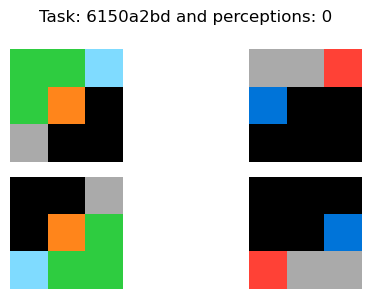

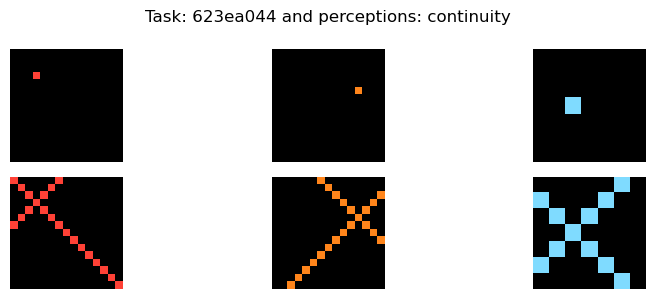

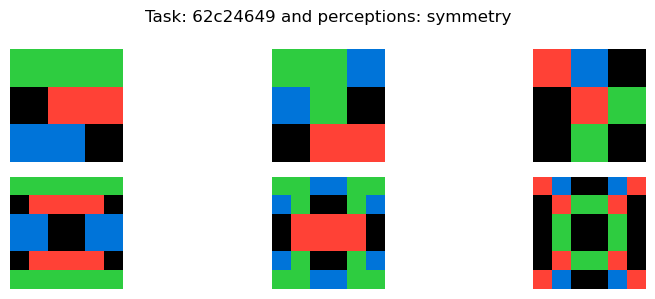

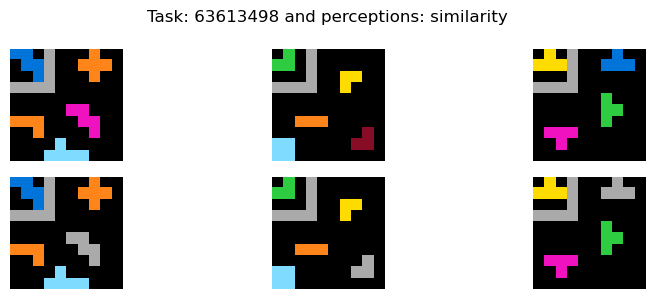

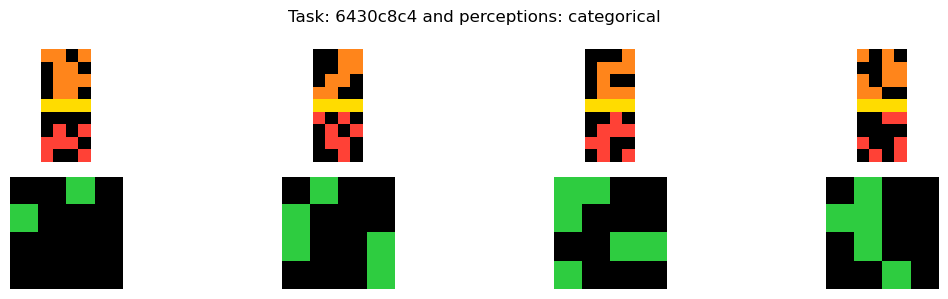

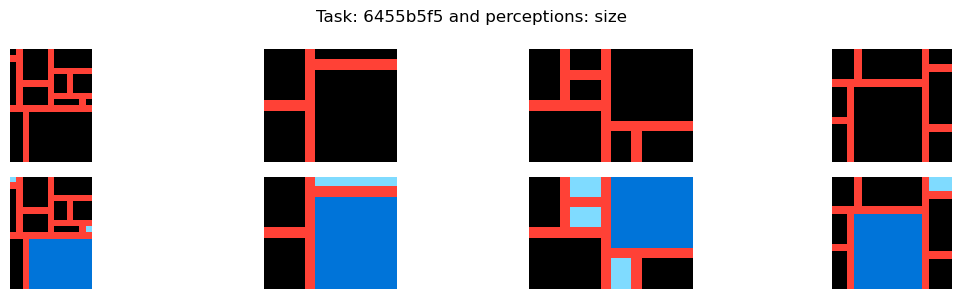

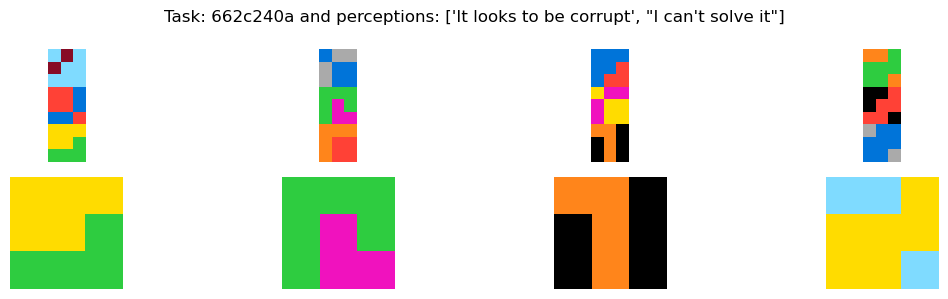

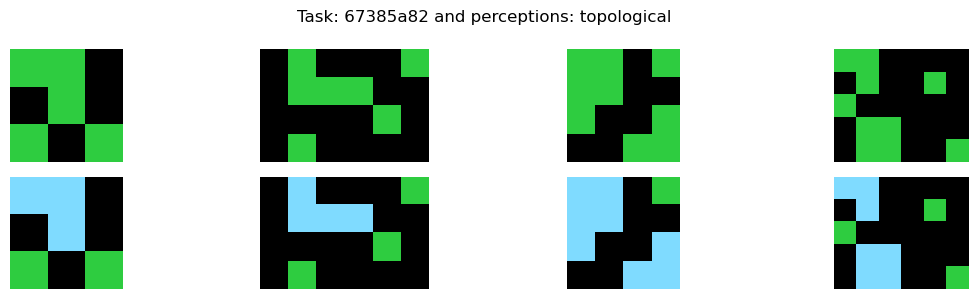

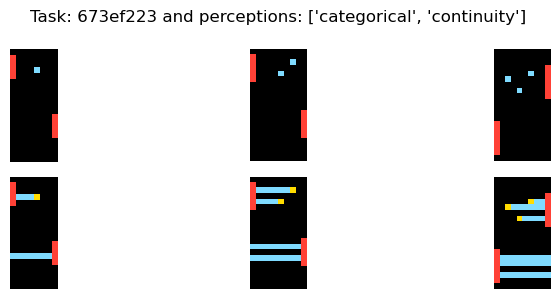

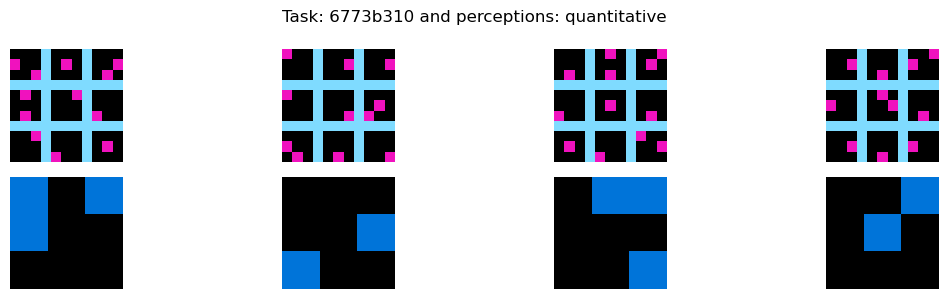

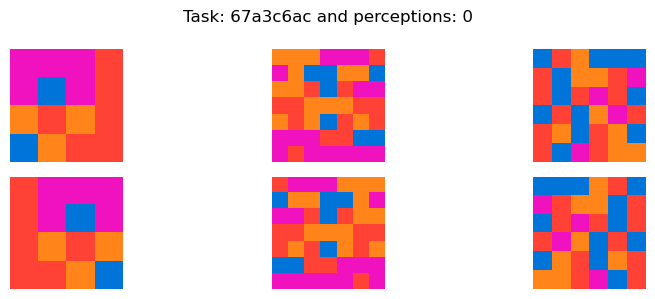

In [82]:
for i in range(len(dic)):

    dat = dic[i]["example"]["train"]
    name = dic[i]["name"]
    label = dic[i]["perceptions"]

    plot_arc_train_data(dat,name,label)
